<a href="https://colab.research.google.com/github/vikasgtm/Analytics_Vidhya/blob/main/AV_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group no 6147
# Project: 3
## Submitted by: Vikas Gautam, Mark, King
## Date: 30/6/2024
## Mail-id: vikasgtm@gmail.com

## Importing libraries

In [ ]:
!pip install cvxpy

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install arch

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import seaborn as sns   # seaborn plottting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm

import cvxpy as cp

import warnings
warnings.filterwarnings("ignore")  # suppress warnings
from statsmodels.tsa.api import VAR
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import statsmodels.api as sm
#from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

plt.rcParams["figure.figsize"] = (8, 8)  # Figure size and width

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss
from arch.unitroot import ADF, KPSS
from arch.unitroot.cointegration import phillips_ouliaris
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.ardl import UECM


In [ ]:
from scipy.optimize import minimize

import seaborn as sns
sns.set()
%config InlineBackend.figure.format='retina'
%matplotlib inline
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16


from sklearn.model_selection import train_test_split
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from collections import Counter, deque
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import VECM, coint_johansen

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.outliers_influence import variance_inflation_factor
from arch.unitroot import ADF, KPSS
import seaborn as sns
from numpy.linalg import eig
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

# Step2 : Import the dataset

Import the dataset from yahoo finance for
ten stocks: "AAPL","MSFT","META","FORD","GM","TSLA","AMZN","GOOG","IBM","GE"
from 2019-01 to 2024-05

In [ ]:
# Fetch historical data for the specified tickers
print ("\n","#"*59, "\n")
ticker_symbol = ["AAPL", "MSFT", "META", "FORD", "GM", "TSLA", "AMZN", "GOOG", "IBM", "GE"]
start_date = "2019-01-01"
end_date = "2024-05-30"
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# DataFrame for Adjusted Close prices
df = pd.DataFrame()
for ticker in ticker_symbol:
    col = ("Adj Close", ticker)
    str_col = f"{ticker}_Adj_Close"
    df[str_col] = stock_data[col]

print(df.head())
print ("\n","#"*59, "\n")
# DataFrame for returns
df2 = pd.DataFrame()
for ticker in ticker_symbol:
    str1 = f"{ticker}_Adj_Close"
    str2 = f"{ticker}_Return"
    df2[str2] = df[str1].pct_change()

# Drop missing values
df.dropna(inplace=True)
df2.dropna(inplace=True)

# Display the first few rows of the returns DataFrame
print(df2.head())
print ("\n","#"*59, "\n")


 ########################################################### 



[*********************100%%**********************]  10 of 10 completed


            AAPL_Adj_Close  MSFT_Adj_Close  META_Adj_Close  FORD_Adj_Close  \
Date                                                                         
2019-01-02       37.793789       95.673470      135.401749            13.4   
2019-01-03       34.029243       92.153809      131.469833            13.0   
2019-01-04       35.481922       96.439819      137.667099            13.4   
2019-01-07       35.402954       96.562820      137.766891            13.5   
2019-01-08       36.077843       97.262962      142.237717            13.4   

            GM_Adj_Close  TSLA_Adj_Close  AMZN_Adj_Close  GOOG_Adj_Close  \
Date                                                                       
2019-01-02     31.238289       20.674667       76.956497       52.233059   
2019-01-03     29.947523       20.024000       75.014000       50.745255   
2019-01-04     30.950424       21.179333       78.769501       53.474648   
2019-01-07     31.906879       22.330667       81.475502       53.358780 

In [ ]:
# df.dropna(inplace=True)
# df2.dropna(inplace=True)
# df.head()

## Breakdown of Apple and Meta Time Series in Trend, Seasonality

<Figure size 800x700 with 0 Axes>

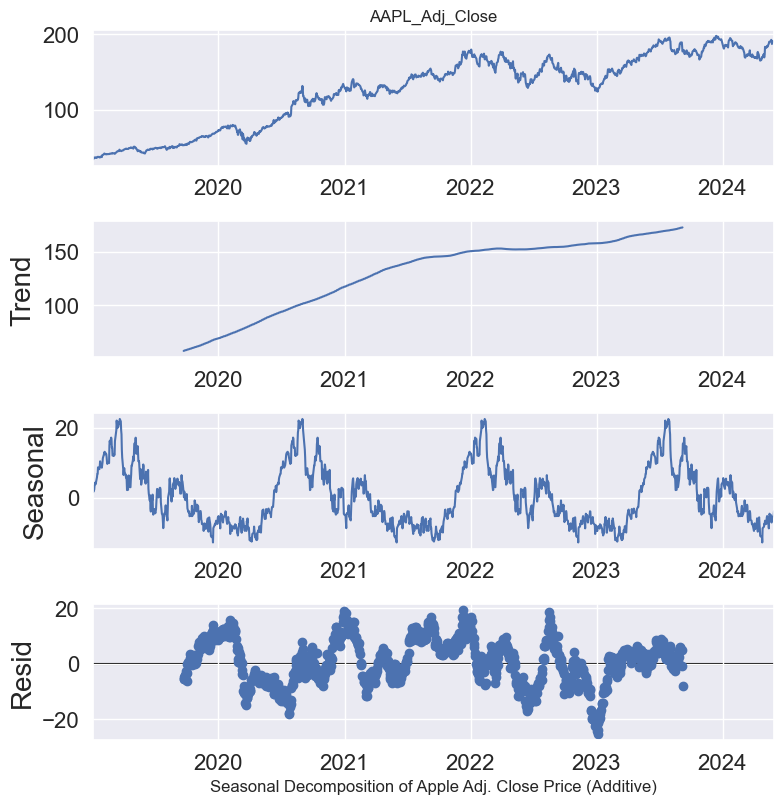

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition for Apple (AAPL) Adjusted Close Prices
apple_adj_close = df['AAPL_Adj_Close']
result_add = seasonal_decompose(apple_adj_close, model='additive', period=365)
result_mult = seasonal_decompose(apple_adj_close, model='multiplicative', period=365)

# Plot the results
plt.figure(figsize=(8, 7))
result_add.plot()
#plt.suptitle('Seasonal Decomposition of Apple Adj. Close Price (Additive)', fontsize=12)
plt.xlabel('Seasonal Decomposition of Apple Adj. Close Price (Additive)', fontsize=12)
plt.show();


<Figure size 800x700 with 0 Axes>

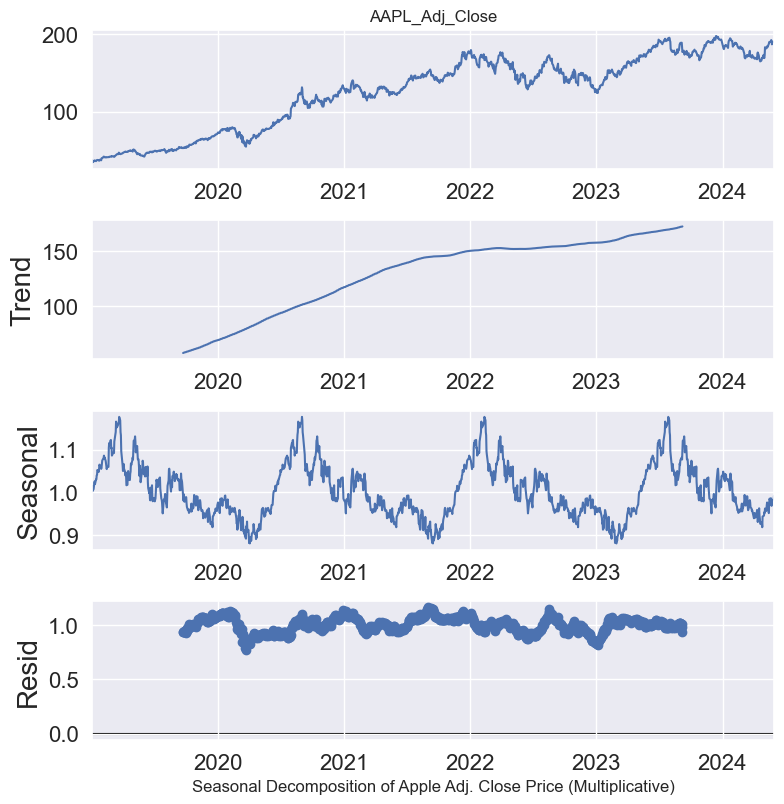

In [ ]:
plt.figure(figsize=(8, 7))
result_mult.plot()
plt.xlabel('Seasonal Decomposition of Apple Adj. Close Price (Multiplicative)', fontsize=12)
plt.show();

<Figure size 800x700 with 0 Axes>

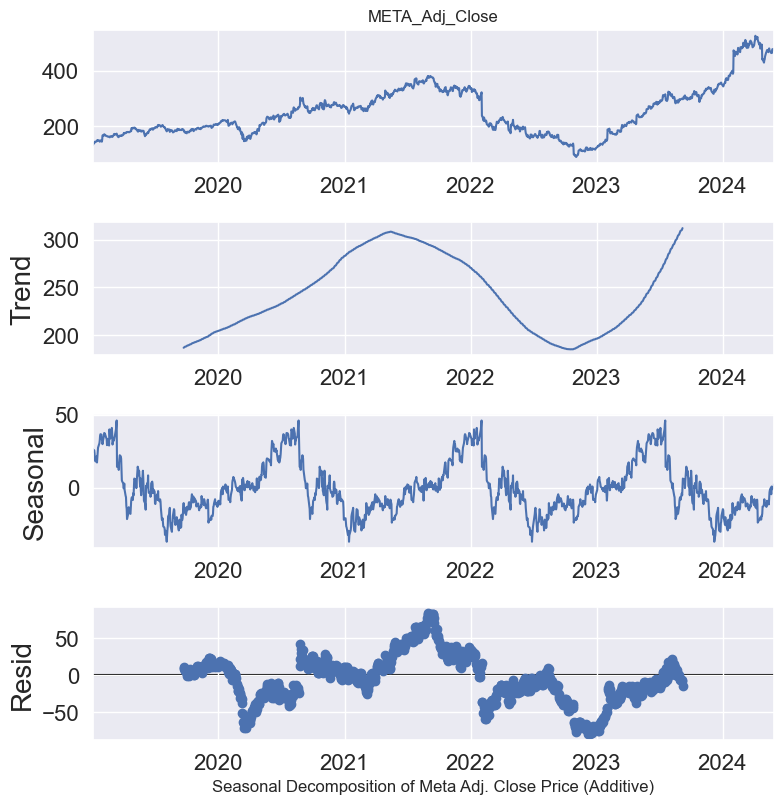

In [ ]:
# Seasonal decomposition for Meta (META) Adjusted Close Prices
meta_adj_close = df['META_Adj_Close']
result_add_meta = seasonal_decompose(meta_adj_close, model='additive', period=365)
result_mult_meta = seasonal_decompose(meta_adj_close, model='multiplicative', period=365)

# Plot the results
plt.figure(figsize=(8, 7))
result_add_meta.plot()
plt.xlabel('Seasonal Decomposition of Meta Adj. Close Price (Additive)', fontsize=12)
plt.show();

# Step1: Category: Regime Change Models


## We will use statsmodels- Markov Regression to model 3 variance regimes in
## logged differrence Apple Stock Time Series¶

In [ ]:
appl=df["AAPL_Adj_Close"]
meta=df["META_Adj_Close"]
msft=df["MSFT_Adj_Close"]
goog=df["GOOG_Adj_Close"]

## Plot the rolling volatility (standard deviation of returns)

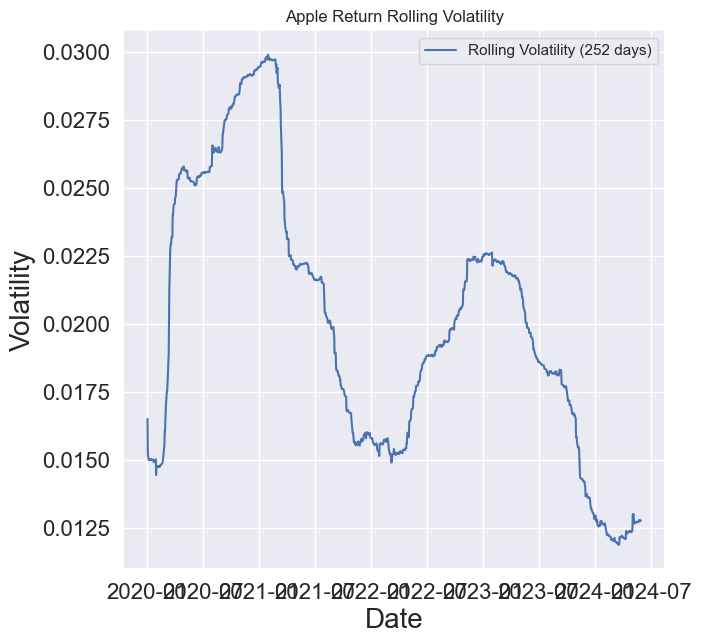

In [ ]:
# Plot the rolling volatility (standard deviation of returns)
rolling_volatility = df2['AAPL_Return'].rolling(window=252).std()  # 252 trading days in a year
plt.figure(figsize=(7, 7))
plt.plot(rolling_volatility, label='Rolling Volatility (252 days)')
plt.title('Apple Return Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

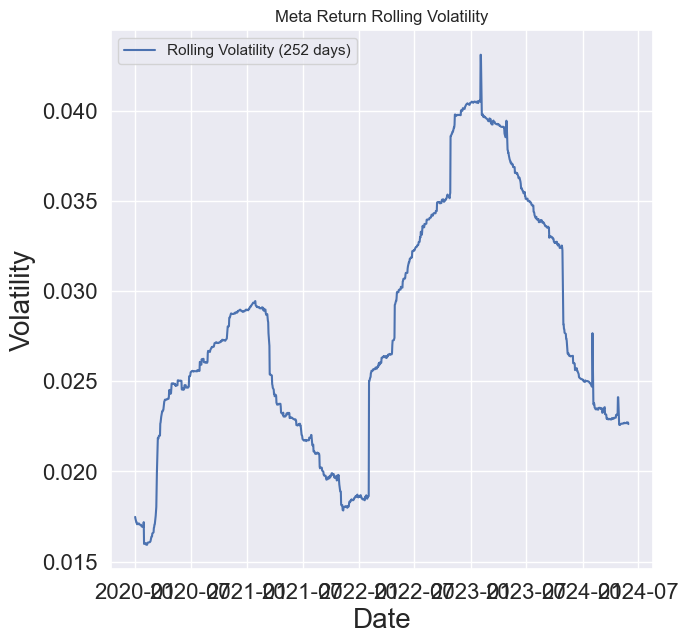

In [ ]:
# Plot the rolling volatility (standard deviation of returns)
rolling_volatility = df2['META_Return'].rolling(window=252).std()  # 252 trading days in a year
plt.figure(figsize=(7, 7))
plt.plot(rolling_volatility, label='Rolling Volatility (252 days)')
plt.title('Meta Return Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

## Taking log and difference of Apple, Meta, MSFT and Google Time Series

In [ ]:
lappl = np.log(appl).diff().dropna()
lmeta=np.log(meta).diff().dropna()
lmsft=np.log(msft).diff().dropna()
lgoog=np.log(goog).diff().dropna()

## 1.1 Markov Regression to idetify 3 regimes on log differenced series of Apple

In [ ]:
mod_kns = sm.tsa.MarkovRegression(lappl.dropna(), k_regimes=3, trend='n', switching_variance=True)
res_kns = mod_kns.fit()
res_kns.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:         AAPL_Adj_Close   No. Observations:                 1360
Model:               MarkovRegression   Log Likelihood                3575.056
Date:                Thu, 04 Jul 2024   AIC                          -7132.112
Time:                        22:16:10   BIC                          -7085.175
Sample:                             0   HQIC                         -7114.541
                               - 1360                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0004    4.2e-05     10.025      0.000       0.000       0.001
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0001   1.12e-05     13.145      0.000       0.000       0.000
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0025      0.001      4.035      0.000       0.001       0.004
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9695      0.010     97.699      0.000       0.950       0.989
p[1->0]        0.0162        nan        nan        nan         nan         nan
p[2->0]        0.1062      0.051      2.088      0.037       0.006       0.206
p[0->1]        0.0171      0.007      2.387      0.017       0.003       0.031
p[1->1]        0.9838        nan        nan        nan         nan         nan
p[2->1]     9.112e-09        nan        nan        nan         nan         nan
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

## 1.2 Smoothed Probabitly Plot for Apple stock Returns

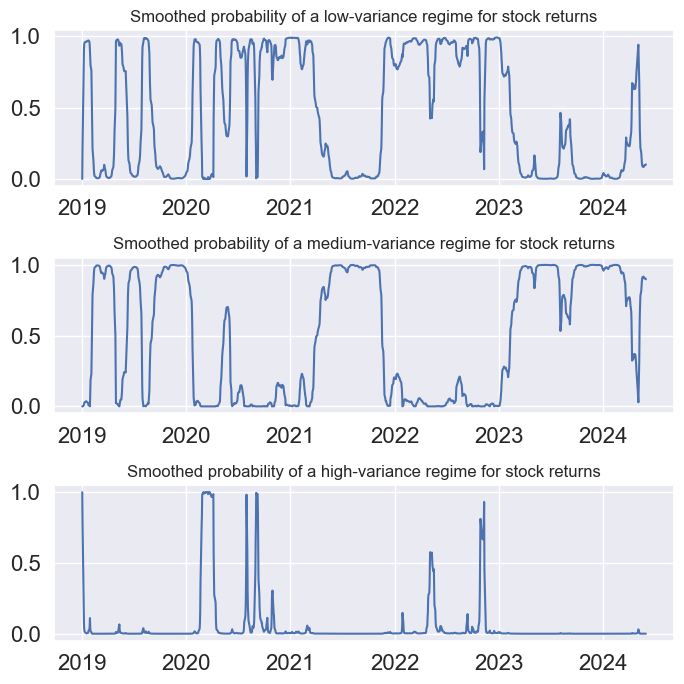

In [ ]:
fig, axes = plt.subplots(3, figsize=(7,7))
ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-variance regime for stock returns')
ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])

ax.set(title='Smoothed probability of a medium-variance regime for stock returns')
ax = axes[2]
ax.plot(res_kns.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-variance regime for stock returns')
fig.tight_layout()

In [ ]:
res_kns.smoothed_marginal_probabilities.head()

,0,1,2
Date,,,
2019-01-03,0.000714,1.317780e-15,0.999286
2019-01-04,0.216507,3.426772e-07,0.783493
2019-01-07,0.664464,2.896763e-03,0.332640
2019-01-08,0.827507,7.904780e-03,0.164588
2019-01-09,0.908719,1.569724e-02,0.075584


## 1.3 Encoding regimes into states.
## 0 --> low variance regime returns
## 1 --> Med variance regime returns
## 2 --> high variance regime returns


In [ ]:
low_var = list(res_kns.smoothed_marginal_probabilities[0])
med_var = list(res_kns.smoothed_marginal_probabilities[1])
high_var = list(res_kns.smoothed_marginal_probabilities[2])
regime_list = []
for i in range(0, len(low_var)):
    if (low_var[i] > high_var[i]) & (low_var[i]>med_var[i]):
        regime_list.append(0)
    elif (med_var[i]>low_var[i]) & (med_var[i]> high_var[i]):
        regime_list.append(1)
    else:
        regime_list.append(2)

In [ ]:
regime_df = pd.DataFrame()
regime_df['regimes'] = regime_list
regime_df

,regimes
0,2
1,2
2,0
3,0
4,0
...,...
1355,1
1356,1
1357,1
1358,1


## 1.4 Plotting the encoded states on the adjusted close price series of the Apple Stock,
## this gives a visual representation of the models regime classifications in time and price space.

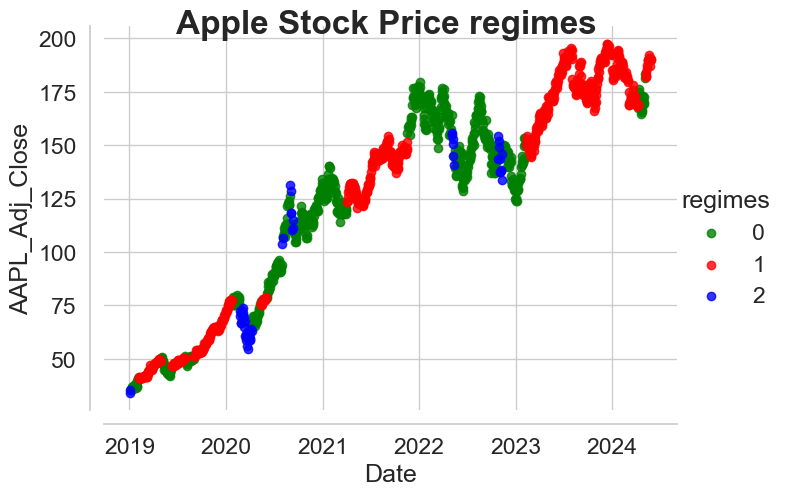

In [ ]:

sns.set(font_scale=1.5)
df = df.iloc[len(df)-len(regime_list):]
regimes = (pd.DataFrame(regime_list, columns=['regimes'], index=df.index)
          .join(df["AAPL_Adj_Close"], how='inner')
          .reset_index(drop=False)
          .rename(columns={'index':'Date'}))
regimes.head()

colors = 'green', 'red', 'blue'
sns.set_style("whitegrid")
order = [0, 1,2]
fg = sns.FacetGrid(data=regimes, hue='regimes', hue_order=order,
                   palette=colors, aspect=1.41, height=5)
fg.map(plt.scatter, 'Date', "AAPL_Adj_Close", alpha=0.8).add_legend()
sns.despine(offset=10)
fg.fig.suptitle('Apple Stock Price regimes', fontsize=24, fontweight='demi');

In [ ]:
aapl_df=pd.DataFrame(df["AAPL_Adj_Close"].copy())
# probabilities
low_var_prob = list(res_kns.smoothed_marginal_probabilities[0])
med_var_prob = list(res_kns.smoothed_marginal_probabilities[1])
high_var_prob = list(res_kns.smoothed_marginal_probabilities[2])
aapl_df['Low_Var_Prob'] = low_var_prob[len(low_var_prob)-len(aapl_df):] # adjust length
aapl_df['Med_Var_Prob'] = med_var_prob[len(med_var_prob)-len(aapl_df):]
aapl_df['High_Var_Prob'] = high_var_prob[len(high_var_prob)-len(aapl_df):]

## 1.5 Creating features for the Random forest classifier model

In [ ]:
aapl_df = aapl_df.merge(
        pd.DataFrame(df2["AAPL_Return"].copy()),
        left_index=True, right_index=True)

## 1.6 Adding Regimes variable to the Apple dataset

In [ ]:
aapl_df.dropna(inplace=True)

# states
aapl_df['regimes'] = regime_list[len(regimes)-len(aapl_df):] # adjust length

aapl_df.head()

,AAPL_Adj_Close,Low_Var_Prob,Med_Var_Prob,High_Var_Prob,AAPL_Return,regimes
Date,,,,,,
2019-01-03,34.029243,0.000714,1.317780e-15,0.999286,-0.099608,2
2019-01-04,35.481922,0.216507,3.426772e-07,0.783493,0.042689,2
2019-01-07,35.402954,0.664464,2.896763e-03,0.332640,-0.002226,0
2019-01-08,36.077843,0.827507,7.904780e-03,0.164588,0.019063,0
2019-01-09,36.690502,0.908719,1.569724e-02,0.075584,0.016982,0


## 1.7 Creating the data labels (i.e. Regime2 column) by shifting the current regimes state back by one day.
## This brings the next days state into the current day, creating a future target state
## for the model to map to and predict.

In [ ]:
aapl_df['regimes2'] = aapl_df['regimes'].shift(-1)
aapl_df.dropna(inplace=True)
aapl_df

,AAPL_Adj_Close,Low_Var_Prob,Med_Var_Prob,High_Var_Prob,AAPL_Return,regimes,regimes2
Date,,,,,,,
2019-01-03,34.029243,0.000714,1.317780e-15,0.999286,-0.099608,2,2.0
2019-01-04,35.481922,0.216507,3.426772e-07,0.783493,0.042689,2,0.0
2019-01-07,35.402954,0.664464,2.896763e-03,0.332640,-0.002226,0,0.0
2019-01-08,36.077843,0.827507,7.904780e-03,0.164588,0.019063,0,0.0
2019-01-09,36.690502,0.908719,1.569724e-02,0.075584,0.016982,0,0.0
...,...,...,...,...,...,...,...
2024-05-20,191.039993,0.084979,9.148855e-01,0.000136,0.006162,1,1.0
2024-05-21,192.350006,0.084522,9.153292e-01,0.000149,0.006857,1,1.0
2024-05-22,190.899994,0.087780,9.120345e-01,0.000185,-0.007538,1,1.0


## 1.8 Creating Target labels

In [ ]:
rf_df = aapl_df.copy()
labels = rf_df.pop('regimes2') # get target states into a variable
labels = labels.astype('int')
rf_df.pop('regimes')

Date
2019-01-03    2
2019-01-04    2
2019-01-07    0
2019-01-08    0
2019-01-09    0
             ..
2024-05-20    1
2024-05-21    1
2024-05-22    1
2024-05-23    1
2024-05-24    1
Name: regimes, Length: 1358, dtype: int64

In [ ]:
rf_df.head()

,AAPL_Adj_Close,Low_Var_Prob,Med_Var_Prob,High_Var_Prob,AAPL_Return
Date,,,,,
2019-01-03,34.029243,0.000714,1.317780e-15,0.999286,-0.099608
2019-01-04,35.481922,0.216507,3.426772e-07,0.783493,0.042689
2019-01-07,35.402954,0.664464,2.896763e-03,0.332640,-0.002226
2019-01-08,36.077843,0.827507,7.904780e-03,0.164588,0.019063
2019-01-09,36.690502,0.908719,1.569724e-02,0.075584,0.016982


## 1.9 Splitting the dataset into training and testing.
## Rebalancing the dataset by oversampling.

In [ ]:
import random
random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(rf_df, labels, test_size=0.2)
Counter(y_train)

Counter({0: 496, 1: 541, 2: 49})

In [ ]:
# re-sample our low_variance regime examples
over_sampler = RandomOverSampler(random_state=40)
X_rs, y_rs = over_sampler.fit_resample(X_train, y_train)
Counter(y_rs)

Counter({0: 541, 1: 541, 2: 541})

## 1.10 Initializing and fitting the Random forest classifier with 20 trees in the forest

In [ ]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_rs, y_rs)

RandomForestClassifier(n_estimators=20)

## 1.11 Making predictions on the testing dataset.

In [ ]:
y_pred = rf.predict(X_test)
y_prob_pred = rf.predict_proba(X_test)

## 1.12 Confusion Matrix

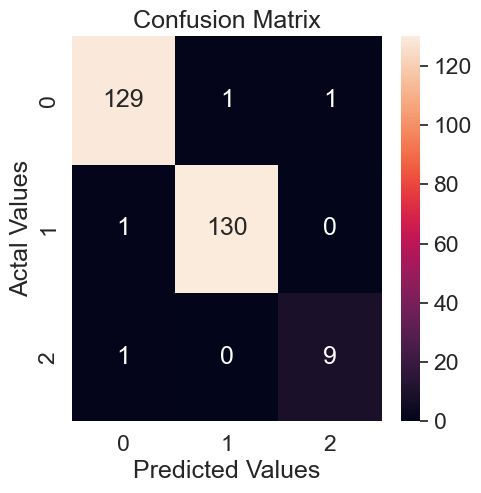

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['0','1','2'],
                     columns = ['0','1','2'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
print (cm_df)

     0    1  2
0  129    1  1
1    1  130  0
2    1    0  9


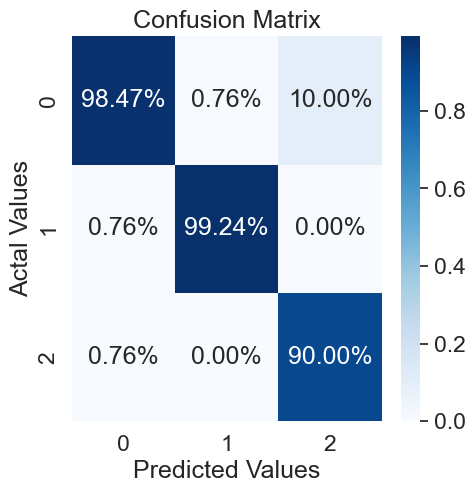

In [ ]:
fig=plt.subplots(figsize=(5,5))
sns.heatmap(cm_df/np.sum(cm_df), annot=True,
            fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show();

# Step 2: King - RegimeChange Model

## 2.1.1 Download the dataset from Yahoo Finance
## SPY is an ETF that tracks the S&P 500 index
## ticker = 'SPY'

In [ ]:
# Download the dataset from Yahoo Finance
# SPY is an ETF that tracks the S&P 500 index
ticker = 'SPY'
df_spy = yf.download(ticker, start='2000-01-01', end='2024-01-01')

[*********************100%%**********************]  1 of 1 completed


## Calculating Cumulative of Returns

In [ ]:
# Structure the data
df_spy['Return'] = df_spy['Adj Close'].pct_change().dropna()
df_spy.iloc[0,6]=0
df_spy['CUM_Return']=[(df_spy.iloc[i,6]+df_spy.iloc[i-1,6]) if i>0 else 0 for i in range(0,df_spy.shape[0]) ]
# Extract the returns
y = df_spy['Adj Close']
df_spy.head()

,Open,High,Low,Close,Adj Close,Volume,Return,CUM_Return
Date,,,,,,,,
2000-01-03,148.25000,148.25000,143.875000,145.4375,93.290169,8164300,0.000000,0.000000
2000-01-04,143.53125,144.06250,139.640625,139.7500,89.641975,8089800,-0.039106,-0.039106
2000-01-05,139.93750,141.53125,137.250000,140.0000,89.802330,12177900,0.001789,-0.037317
2000-01-06,139.62500,141.50000,137.750000,137.7500,88.359062,6227200,-0.016072,-0.014283
2000-01-07,140.31250,145.75000,140.062500,145.7500,93.490631,8066500,0.058076,0.042005


## 2.1.2 Fit the Markov Switching Model

In [ ]:
# Fit the Markov Switching Model
model = MarkovRegression(y, k_regimes=3, trend='c', switching_variance=True)
result = model.fit()

In [ ]:
# Print the summary of the model
print(result.summary())

                        Markov Switching Model Results                        
Dep. Variable:              Adj Close   No. Observations:                 6037
Model:               MarkovRegression   Log Likelihood              -28378.087
Date:                Thu, 04 Jul 2024   AIC                          56780.174
Time:                        22:32:05   BIC                          56860.642
Sample:                             0   HQIC                         56808.109
                               - 6037                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.1644      0.239    310.215      0.000      73.696      74.633
sigma2        81.6717      2.883     28.330      0.0

## 2.1.3 Plotting of Adj CLose, Return and Rolling Volatility of SPY

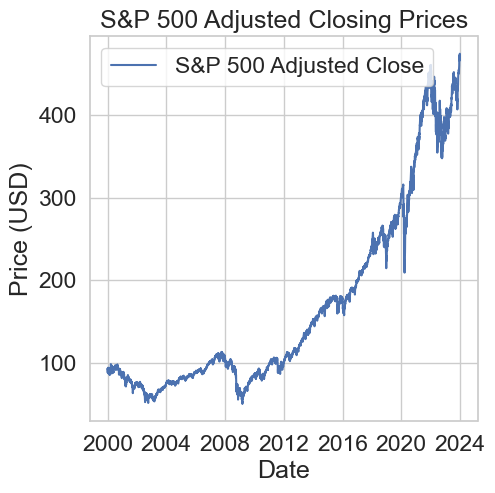

In [ ]:
# Plot the adjusted closing prices
plt.figure(figsize=(5, 5))
plt.plot(df_spy['Adj Close'], label='S&P 500 Adjusted Close')
plt.title('S&P 500 Adjusted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

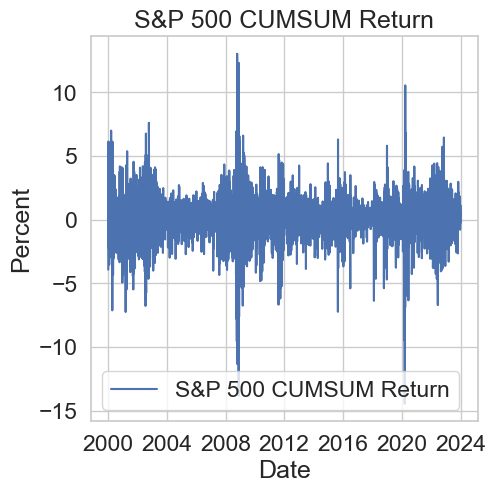

In [ ]:
# Plot the SPY CUMSUM Return
plt.figure(figsize=(5, 5))
plt.plot(df_spy[1:]['CUM_Return']*100, label='S&P 500 CUMSUM Return')
plt.title('S&P 500 CUMSUM Return')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.legend()
plt.show()

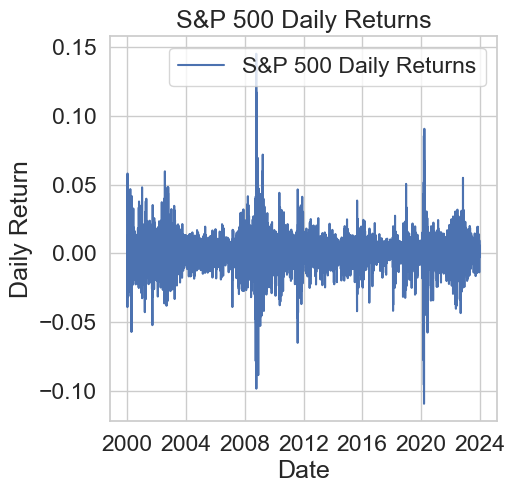

In [ ]:
# Plot the daily returns
plt.figure(figsize=(5, 5))
plt.plot(df_spy['Return'], label='S&P 500 Daily Returns')
plt.title('S&P 500 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

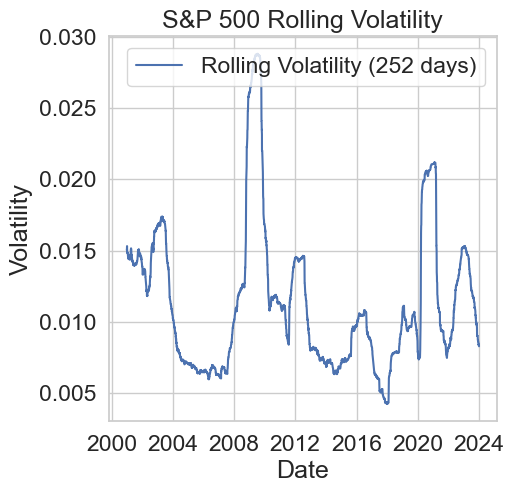

In [ ]:
# Plot the rolling volatility (standard deviation of returns)
rolling_volatility = df_spy['Return'].rolling(window=252).std()  # 252 trading days in a year
plt.figure(figsize=(5, 5))
plt.plot(rolling_volatility, label='Rolling Volatility (252 days)')
plt.title('S&P 500 Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

## 2.1.4 Smoothed Probability of Regimes of SPY Adj Close

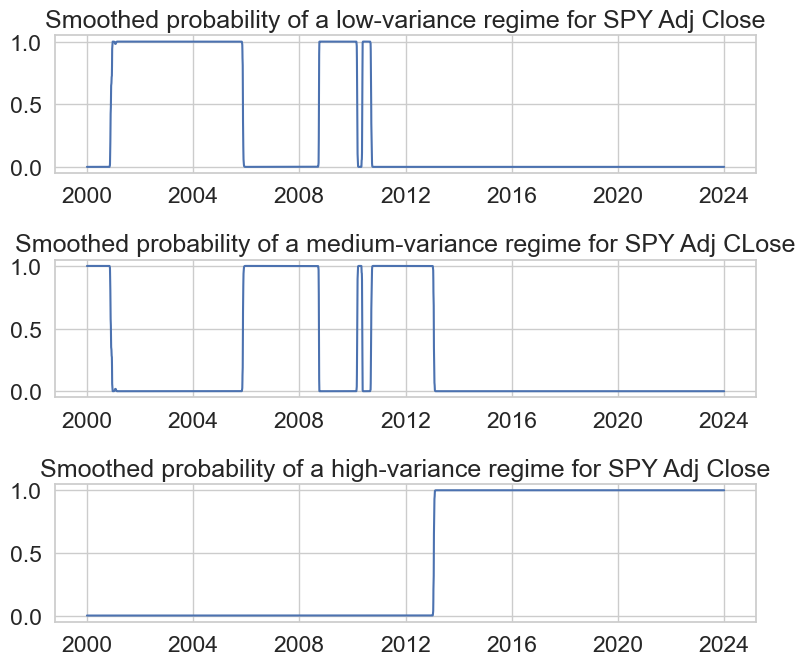

In [ ]:
fig, axes = plt.subplots(3, figsize=(8,7))
ax = axes[0]
ax.plot(result.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-variance regime for SPY Adj Close')
ax = axes[1]
ax.plot(result.smoothed_marginal_probabilities[1])

ax.set(title='Smoothed probability of a medium-variance regime for SPY Adj CLose')
ax = axes[2]
ax.plot(result.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-variance regime for SPY Adj Close')
fig.tight_layout()

In [ ]:
result.smoothed_marginal_probabilities.head()

,0,1,2
Date,,,
2000-01-03,0.000410,0.999586,4.231244e-06
2000-01-04,0.000176,0.999823,1.535257e-07
2000-01-05,0.000076,0.999924,6.521252e-09
2000-01-06,0.000035,0.999965,1.542027e-09
2000-01-07,0.000005,0.999995,7.623677e-10


## 2.1.5 Encoding regimes into states.
## 0 --> low variance regime returns
## 1 --> Med variance regime returns
## 2 --> high variance regime returns


In [ ]:
low_varspy = list(result.smoothed_marginal_probabilities[0])
med_varspy = list(result.smoothed_marginal_probabilities[1])
high_varspy = list(result.smoothed_marginal_probabilities[2])
regime_listspy = []
for i in range(0, len(low_varspy)):
    if (low_varspy[i] > high_varspy[i]) & (low_varspy[i]>med_varspy[i]):
        regime_listspy.append(0)
    elif (med_varspy[i]>low_varspy[i]) & (med_varspy[i]> high_varspy[i]):
        regime_listspy.append(1)
    else:
        regime_listspy.append(2)

In [ ]:
regime_dfspy = pd.DataFrame()
regime_dfspy['regimes'] = regime_listspy
regime_dfspy

,regimes
0,1
1,1
2,1
3,1
4,1
...,...
6032,2
6033,2
6034,2
6035,2


## 2.1.6 Plotting the encoded regime states on the series of the SPY,
## this gives a visual representation of the models regime classifications in time and price space.

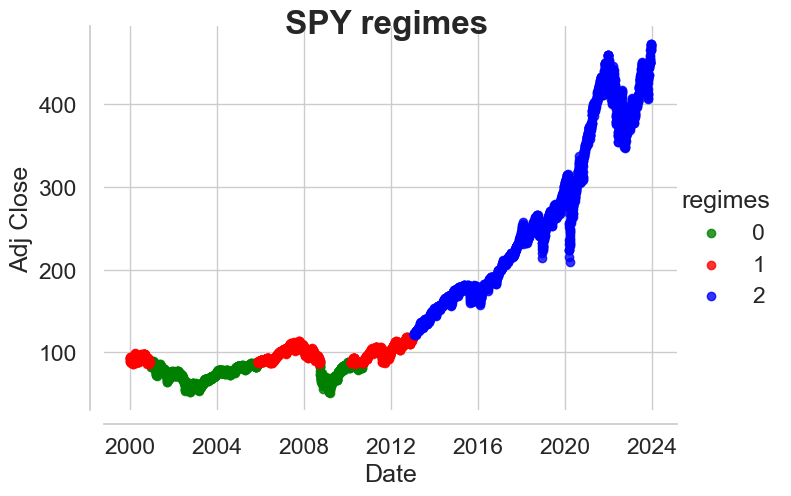

In [ ]:
sns.set(font_scale=1.5)
df_spy = df_spy.iloc[len(df_spy)-len(regime_listspy):]
regimes_spy = (pd.DataFrame(regime_listspy, columns=['regimes'], index=df_spy.index)
          .join(df_spy["Adj Close"], how='inner')
          .reset_index(drop=False)
          .rename(columns={'index':'Date'}))
regimes_spy.head()

colors = 'green', 'red', 'blue'
sns.set_style("whitegrid")
order = [0, 1,2]
fg = sns.FacetGrid(data=regimes_spy, hue='regimes', hue_order=order,
                   palette=colors, aspect=1.41, height=5)
fg.map(plt.scatter, 'Date', "Adj Close", alpha=0.8).add_legend()
sns.despine(offset=10)
fg.fig.suptitle('SPY regimes', fontsize=24, fontweight='demi');

In [ ]:
spy_df2=pd.DataFrame(df_spy["Adj Close"].copy())
# probabilities
SPY_low_var_prob = list(result.smoothed_marginal_probabilities[0])
SPY_med_var_prob = list(result.smoothed_marginal_probabilities[1])
SPY_high_var_prob = list(result.smoothed_marginal_probabilities[2])
spy_df2['Low_Var_Prob'] = SPY_low_var_prob[len(SPY_low_var_prob)-len(spy_df2):] # adjust length
spy_df2['Med_Var_Prob'] = SPY_med_var_prob[len(SPY_med_var_prob)-len(spy_df2):]
spy_df2['High_Var_Prob'] = SPY_high_var_prob[len(SPY_high_var_prob)-len(spy_df2):]

## 2.1.7 Creating features for the random forest classifier to test our model

In [ ]:
spy_df2.dropna(inplace=True)

# states
spy_df2['regimes'] = regime_listspy[len(regimes_spy)-len(spy_df2):] # adjust length

spy_df2.head()

,Adj Close,Low_Var_Prob,Med_Var_Prob,High_Var_Prob,regimes
Date,,,,,
2000-01-03,93.290169,0.000410,0.999586,4.231244e-06,1
2000-01-04,89.641975,0.000176,0.999823,1.535257e-07,1
2000-01-05,89.802330,0.000076,0.999924,6.521252e-09,1
2000-01-06,88.359062,0.000035,0.999965,1.542027e-09,1
2000-01-07,93.490631,0.000005,0.999995,7.623677e-10,1


## 2.1.8 Creating the data labels (i.e. regime2 column) by shifting the current regimes state back by one day.
## This brings the next days state into the current day, creating a future target state
## for the model to map to and predict.

In [ ]:
spy_df2['regimes2'] = spy_df2['regimes'].shift(-1)
spy_df2.dropna(inplace=True)
spy_df2

,Adj Close,Low_Var_Prob,Med_Var_Prob,High_Var_Prob,regimes,regimes2
Date,,,,,,
2000-01-03,93.290169,0.000410,0.999586,4.231244e-06,1,1.0
2000-01-04,89.641975,0.000176,0.999823,1.535257e-07,1,1.0
2000-01-05,89.802330,0.000076,0.999924,6.521252e-09,1,1.0
2000-01-06,88.359062,0.000035,0.999965,1.542027e-09,1,1.0
2000-01-07,93.490631,0.000005,0.999995,7.623677e-10,1,1.0
...,...,...,...,...,...,...
2023-12-21,469.720490,0.000000,0.000000,1.000000e+00,2,2.0
2023-12-22,470.664490,0.000000,0.000000,1.000000e+00,2,2.0
2023-12-26,472.651886,0.000000,0.000000,1.000000e+00,2,2.0


In [ ]:
spy_rf_df = spy_df2.copy()
spy_labels = spy_rf_df.pop('regimes2') # get target states into a variable
spy_labels = spy_labels.astype('int')
spy_rf_df.pop('regimes')

Date
2000-01-03    1
2000-01-04    1
2000-01-05    1
2000-01-06    1
2000-01-07    1
             ..
2023-12-21    2
2023-12-22    2
2023-12-26    2
2023-12-27    2
2023-12-28    2
Name: regimes, Length: 6036, dtype: int64

## 2.1.9 Splitting the dataset into training and testing.
## Rebalancing the dataset by oversampling.

In [ ]:
X_trainspy, X_testspy, y_trainspy, y_testspy = train_test_split(spy_rf_df, spy_labels, test_size=0.2)
Counter(y_trainspy)

Counter({1: 1272, 0: 1333, 2: 2223})

In [ ]:
# undersample our low_variance regime examples
over_sampler = RandomOverSampler(random_state=40)
X_rsspy, y_rsspy = over_sampler.fit_resample(X_trainspy, y_trainspy)
Counter(y_rsspy)

Counter({1: 2223, 0: 2223, 2: 2223})

## 2.1.10 Initializing and fitting the random forest classifier with 20 trees in the forest

In [ ]:
rf_spy = RandomForestClassifier(n_estimators=20)
rf_spy.fit(X_rsspy, y_rsspy)

RandomForestClassifier(n_estimators=20)

In [ ]:
y_predspy = rf_spy.predict(X_testspy)
y_prob_predspy = rf_spy.predict_proba(X_testspy)

## 2.1.11 Confusion Matrix for SPY Regimes labels

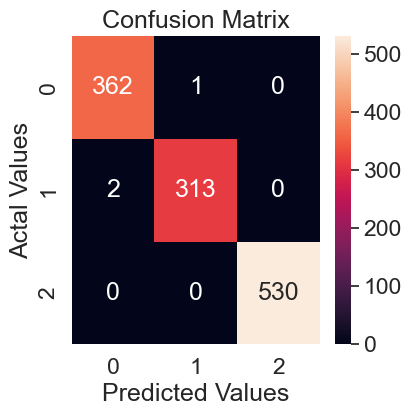

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm_spy = confusion_matrix(y_testspy, y_predspy)

# Creating a dataframe for a array-formatted Confusion matrix
cm_dfspy = pd.DataFrame(cm_spy,
                     index = ['0','1','2'],
                     columns = ['0','1','2'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(cm_dfspy, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
print (cm_dfspy)

     0    1    2
0  362    1    0
1    2  313    0
2    0    0  530


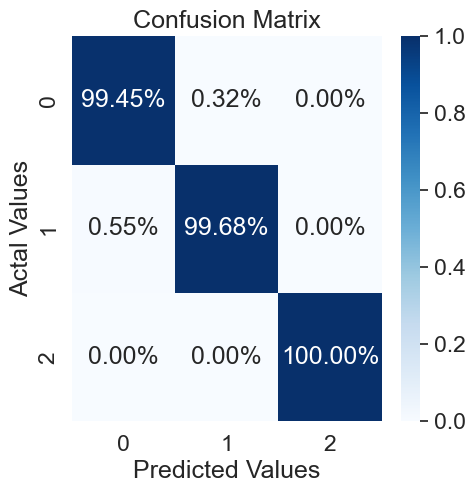

In [ ]:
fig=plt.subplots(figsize=(5,5))
sns.heatmap(cm_dfspy/np.sum(cm_dfspy), annot=True,
            fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show();

# Step2: Mark

## Non-Stationarity- Cointegration

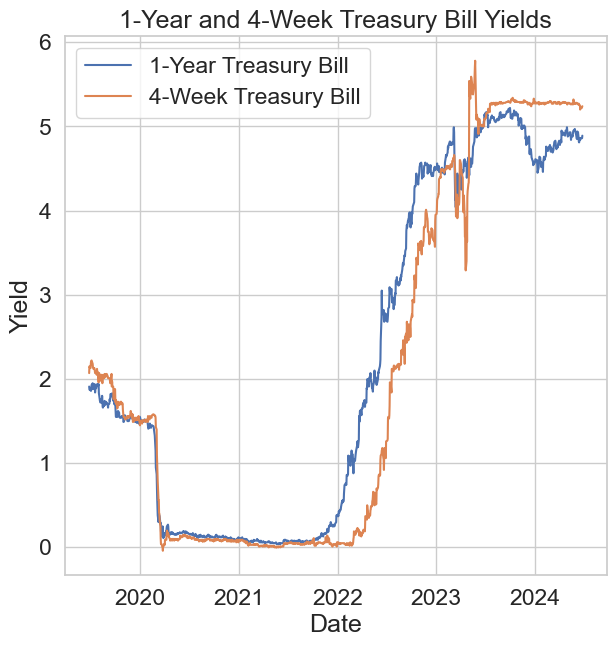

In [ ]:
from statsmodels.tsa.stattools import coint

# Load the data
data_1yr = pd.read_csv("./DTB1YR.csv")
data_4wk = pd.read_csv("./DTB4WK.csv")

# Convert the DATE columns to datetime format
data_1yr['DATE'] = pd.to_datetime(data_1yr['DATE'])
data_4wk['DATE'] = pd.to_datetime(data_4wk['DATE'])

# Replace non-numeric values with NaN and convert columns to numeric
data_1yr['DTB1YR'] = pd.to_numeric(data_1yr['DTB1YR'].replace('.', pd.NA))
data_4wk['DTB4WK'] = pd.to_numeric(data_4wk['DTB4WK'].replace('.', pd.NA))

# Merge the datasets on the DATE column
merged_data_clean = pd.merge(data_1yr, data_4wk, on='DATE')

# Drop rows with NaN values
merged_data_clean.dropna(inplace=True)

# Plot the original data
plt.figure(figsize=(7, 7))
plt.plot(merged_data_clean['DATE'], merged_data_clean['DTB1YR'], label='1-Year Treasury Bill')
plt.plot(merged_data_clean['DATE'], merged_data_clean['DTB4WK'], label='4-Week Treasury Bill')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.title('1-Year and 4-Week Treasury Bill Yields')
plt.legend()
plt.grid(True)
plt.show()



## perform the Augmented Dickey-Fuller test

In [ ]:
# Function to perform the Augmented Dickey-Fuller test
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, val in result[4].items():
        out[f'Critical Value ({key})'] = val
    print(out.to_string())
    print('')

# Perform ADF tests on the original data
adf_test(merged_data_clean['DTB1YR'], '1-Year Treasury Bill')
adf_test(merged_data_clean['DTB4WK'], '4-Week Treasury Bill')

# Function to perform the cointegration test
def cointegration_test(series1, series2):
    coint_t, p_value, critical_values = coint(series1, series2)
    print('Cointegration Test')
    print(f'Cointegration Test Statistic: {coint_t}')
    print(f'p-value: {p_value}')
    for cv, value in zip(['1%', '5%', '10%'], critical_values):
        print(f'Critical Value ({cv}): {value}')
    print('')

# Perform the cointegration test on the original data
cointegration_test(merged_data_clean['DTB1YR'], merged_data_clean['DTB4WK'])

Augmented Dickey-Fuller Test: 1-Year Treasury Bill
ADF Test Statistic               -0.039182
p-value                           0.955169
# Lags Used                      22.000000
Number of Observations Used    1229.000000
Critical Value (1%)              -3.435682
Critical Value (5%)              -2.863895
Critical Value (10%)             -2.568024

Augmented Dickey-Fuller Test: 4-Week Treasury Bill
ADF Test Statistic                0.194096
p-value                           0.971928
# Lags Used                      20.000000
Number of Observations Used    1231.000000
Critical Value (1%)              -3.435673
Critical Value (5%)              -2.863891
Critical Value (10%)             -2.568022

Cointegration Test
Cointegration Test Statistic: -1.7883870383073805
p-value: 0.6353456142994873
Critical Value (1%): -3.9052159393763968
Critical Value (5%): -3.3410185324034933
Critical Value (10%): -3.0478419858198174



## Perform differencing to achieve stationarity

In [ ]:
# Perform differencing to achieve stationarity
merged_data_clean['DTB1YR_diff'] = merged_data_clean['DTB1YR'].diff().dropna()
merged_data_clean['DTB4WK_diff'] = merged_data_clean['DTB4WK'].diff().dropna()

# Function to perform the Augmented Dickey-Fuller test
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, val in result[4].items():
        out[f'Critical Value ({key})'] = val
    print(out.to_string())
    print('')

# Perform ADF tests on the differenced data
adf_test(merged_data_clean['DTB1YR_diff'], '1-Year Treasury Bill Differenced')
adf_test(merged_data_clean['DTB4WK_diff'], '4-Week Treasury Bill Differenced')

# Function to perform the cointegration test
def cointegration_test(series1, series2):
    coint_t, p_value, critical_values = coint(series1, series2)
    print('Cointegration Test')
    print(f'Cointegration Test Statistic: {coint_t}')
    print(f'p-value: {p_value}')
    for cv, value in zip(['1%', '5%', '10%'], critical_values):
        print(f'Critical Value ({cv}): {value}')
    print('')

# Perform the cointegration test
cointegration_test(merged_data_clean['DTB1YR'], merged_data_clean['DTB4WK'])

Augmented Dickey-Fuller Test: 1-Year Treasury Bill Differenced
ADF Test Statistic            -5.652748e+00
p-value                        9.775560e-07
# Lags Used                    2.100000e+01
Number of Observations Used    1.229000e+03
Critical Value (1%)           -3.435682e+00
Critical Value (5%)           -2.863895e+00
Critical Value (10%)          -2.568024e+00

Augmented Dickey-Fuller Test: 4-Week Treasury Bill Differenced
ADF Test Statistic            -7.290719e+00
p-value                        1.419621e-10
# Lags Used                    1.900000e+01
Number of Observations Used    1.231000e+03
Critical Value (1%)           -3.435673e+00
Critical Value (5%)           -2.863891e+00
Critical Value (10%)          -2.568022e+00

Cointegration Test
Cointegration Test Statistic: -1.7883870383073805
p-value: 0.6353456142994873
Critical Value (1%): -3.9052159393763968
Critical Value (5%): -3.3410185324034933
Critical Value (10%): -3.0478419858198174



# Step2: Vikas Gautam - Non Stationarity, Cointegration, Equilibrium Models

## 2.1 Calculate VIF for each feature

In [ ]:
# Calculate daily returns
returns = df.pct_change().dropna()

# Add a constant to the model
X = sm.add_constant(df2)

# Fit the model
model = sm.OLS(df2['AAPL_Return'], X.drop(columns=['AAPL_Return'])).fit()

# Print the summary
print(model.summary())

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:            AAPL_Return   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     250.2
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          2.77e-280
Time:                        23:10:31   Log-Likelihood:                 4064.0
No. Observations:                1360   AIC:                            -8108.
Df Residuals:                    1350   BIC:                            -8056.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0002      0.000      0.688      

Durbin_watson is close to 2
skew is just above 0..
MSFT,META, TSLA, AMZN, GGOG, IBM have come as significant (p < 0.05)

# 2.2 Correlation Matrix

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
#print(correlation_matrix)


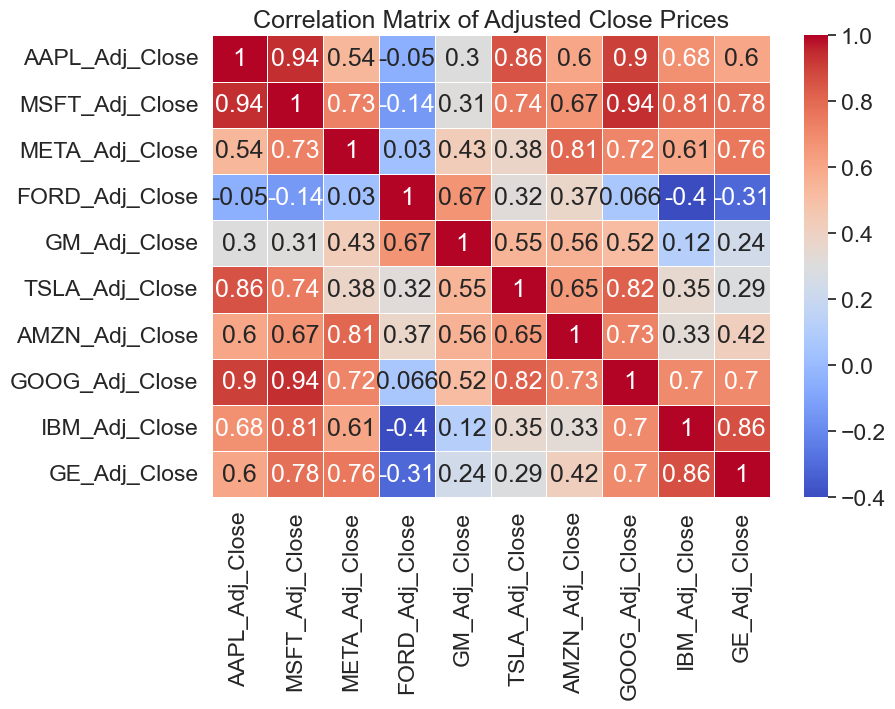

In [ ]:
# Plot the correlation matrix
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Adjusted Close Prices')
plt.show()

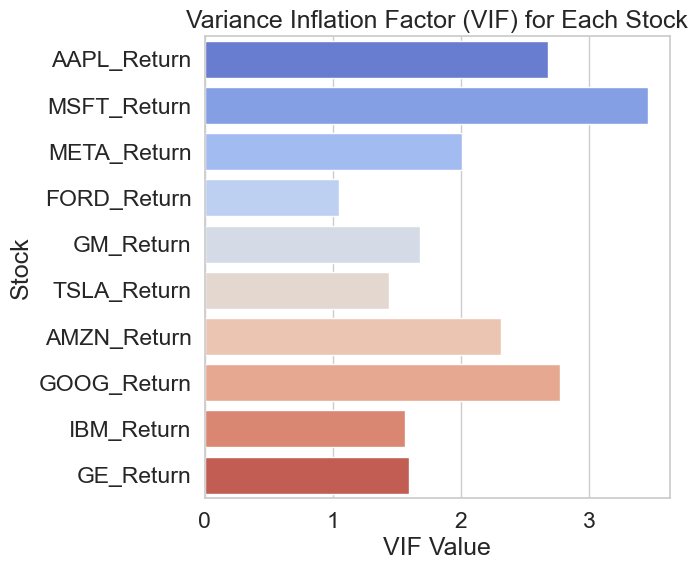

In [ ]:
# Calculate VIF without adding a constant
#Fig=plt.subplots(figsize=(6,5))
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]

# Plot VIF values
plt.figure(figsize=(6, 6))
sns.barplot(x="VIF", y="feature", data=vif_data, palette="coolwarm")
plt.title('Variance Inflation Factor (VIF) for Each Stock')
plt.xlabel('VIF Value')
plt.ylabel('Stock')
plt.show()

## 2.3 Plotting the time series of Adj Closing  Prices and Returns

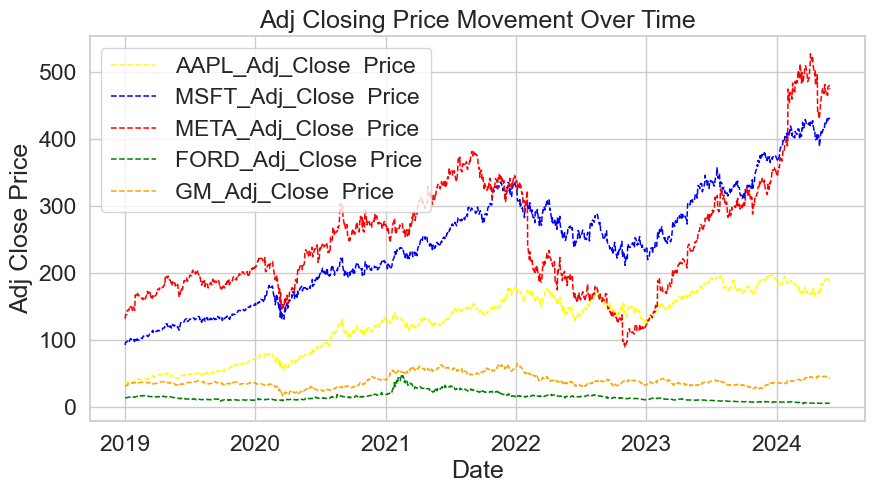

In [ ]:
# Plotting the time series of Closing  Prices
fig = plt.subplots(figsize=(10, 5))
color=['yellow','blue','red','green','orange']
for id,col in enumerate(df.columns):

        if id<5:
        #df[col].plot(linewidth=0.8, label="Original "+col+ " stock price")
            plt.plot(df.index, df[col], label=col+'  Price', color=color[id], linestyle='--',linewidth=1.1)

plt.title('Adj Closing Price Movement Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.grid(True)
plt.show()

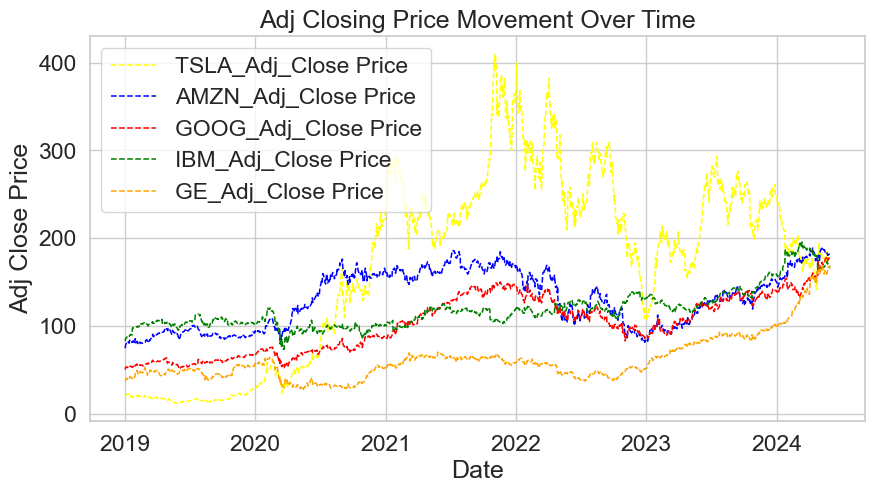

In [ ]:
# Plotting the time series of Closing  Prices
fig,ax = plt.subplots(figsize=(10, 5))
color=['yellow','blue','red','green','orange']
for id,col in enumerate(df.columns):

        if id>=5:
        #df[col].plot(linewidth=0.8, label="Original "+col+ " stock price")
            plt.plot(df.index, df[col], label=col+' Price', color=color[id-5], linestyle='--',linewidth=1.1)

plt.title('Adj Closing Price Movement Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.grid(True)
plt.show();

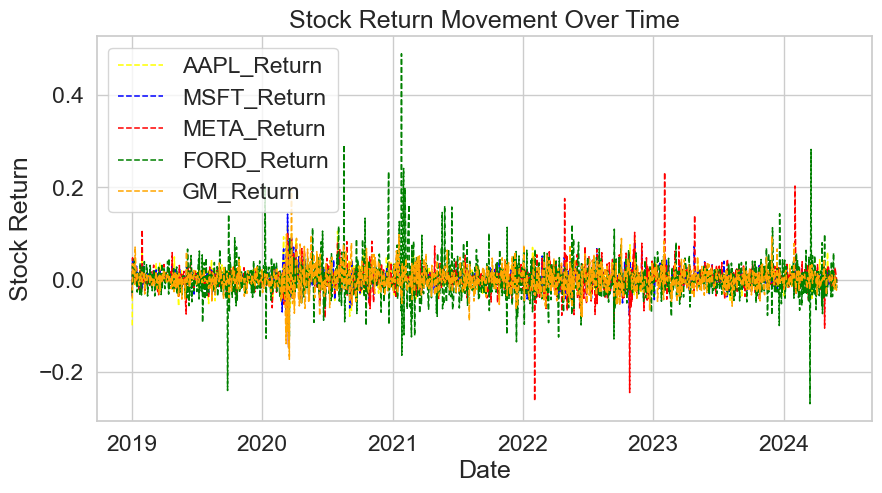

In [ ]:
# add to colab
# Plotting the time series of Returns
fig = plt.subplots(figsize=(10, 5))
color=['yellow','blue','red','green','orange']
for id,col in enumerate(df2.columns):

        if id<5:
        #df[col].plot(linewidth=0.8, label="Original "+col+ " stock price")
            plt.plot(df2.index, df2[col], label=col, color=color[id], linestyle='--',linewidth=1.1)

plt.title('Stock Return Movement Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Return')
plt.legend()
plt.grid(True)
plt.show()

## 2.4 Step : Standardizing the data and apply PCA

In [ ]:
X_sc = df.values # getting all values as a matrix of dataframe
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X_sc) # standardizing the data
#X_std

## 2.5 Step: Apply PCA

In [ ]:
pca = PCA()
X_pca = pca.fit(X_std)

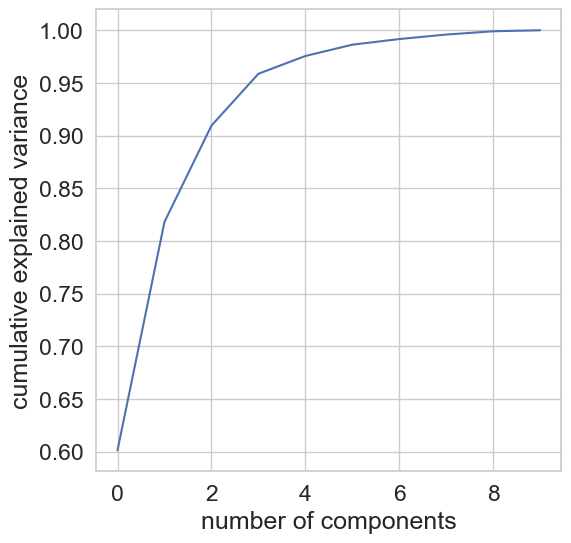

In [ ]:
Fig=plt.subplots(figsize=(6,6))
plt.plot(np.cumsum(X_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show();

## 2.6 Step: Determine the number of components which can explain arounf 95%
## variance

In [ ]:
pca3 = PCA(n_components = 0.95)
X_pca3 = pca3.fit_transform(X_std) # this will fit and reduce dimensions
print(pca3.n_components_)
# we can print and see how many components are selected. In this case it is 4

4


In [ ]:
pd.DataFrame(pca3.components_, columns = df.columns)

,AAPL_Adj_Close,MSFT_Adj_Close,META_Adj_Close,FORD_Adj_Close,GM_Adj_Close,TSLA_Adj_Close,AMZN_Adj_Close,GOOG_Adj_Close,IBM_Adj_Close,GE_Adj_Close
0,0.366218,0.392968,0.332368,0.019659,0.210723,0.317126,0.319921,0.395562,0.309617,0.317729
1,-0.049313,-0.129555,-0.019864,0.641307,0.466797,0.247333,0.260755,0.026012,-0.362374,-0.300095
2,-0.423868,-0.152293,0.533391,0.094899,0.244188,-0.512357,0.211259,-0.131899,0.079719,0.336319
3,0.041332,0.070633,0.326169,-0.120498,-0.570320,0.003890,0.590146,-0.058470,-0.329477,-0.294738


## Our Chosen stocks as per PCA

In [ ]:
n_pcs= pca3.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca3.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
print (most_important_names)

['GOOG_Adj_Close', 'FORD_Adj_Close', 'META_Adj_Close', 'AMZN_Adj_Close']


In [ ]:
most_important

[7, 3, 2, 6]

## 2.7 Plot of Logged Difference of Apple, META and MSFT: Stock Price

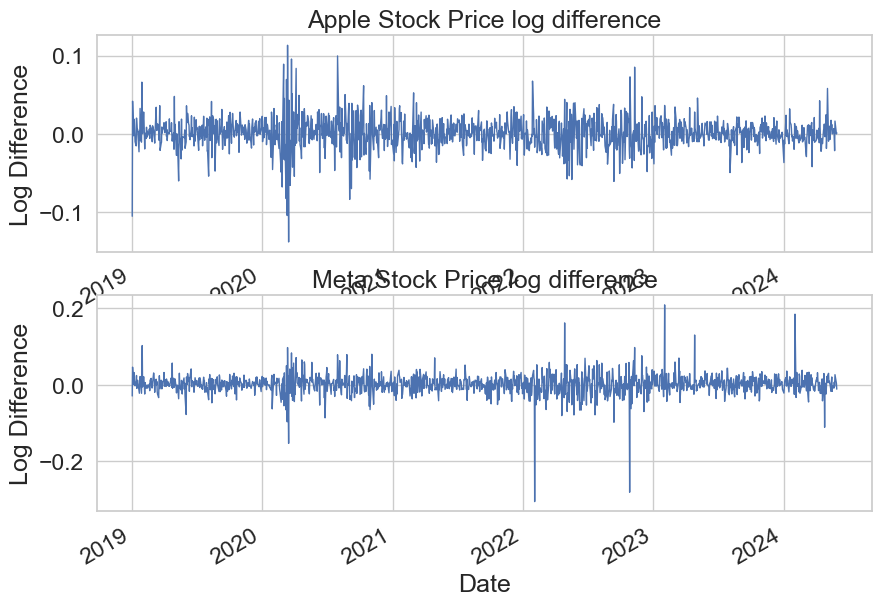

In [ ]:
# Plot logged difference of Apple, Meta and MSFT price time series chart
fig,(ax1,ax2)= plt.subplots(2, 1,figsize=(10,7))
#lappl = np.log(appl).diff().dropna()
#lmeta=np.log(meta).diff().dropna()
#lmsft=np.log(msft).diff().dropna()
lappl.plot(
    linewidth=1,
    xlabel="Date",
    ylabel="Log Difference",
    title="Apple Stock Price log difference",ax=ax1
)
#plt.show()
lmeta.plot(
    linewidth=1,
    xlabel="Date",
    ylabel="Log Difference",
    title="Meta Stock Price log difference",ax=ax2
)
#plt.show()

plt.show()

## 2.8 ADF Test Results with 5% Significance Level for
## Apple, META and MSFT Stock Price

In [ ]:
# ADF Test Results with 5% Significance Level for Differenced Time Series
lappl_adf= ADF(appl,trend="n", method="bic")
lmeta_adf = ADF(meta, trend="n", method="bic")
lmsft_adf = ADF(msft, trend="n", method="bic")

pd.DataFrame(
    {
        "Apple Stock Price": (lappl_adf.stat, lappl_adf.critical_values["5%"]),
        "| Meta Stock Price": (lmeta_adf.stat, lmeta_adf.critical_values["5%"]),
        "| MSFT Stock Price": (
            lmsft_adf.stat,
            lmsft_adf.critical_values["5%"],
        ),
    },
    index=["ADF Test Statistic", "5% Critical Value"],
)


,Apple Stock Price,| Meta Stock Price,| MSFT Stock Price
ADF Test Statistic,1.152335,1.086387,2.060742
5% Critical Value,-1.941199,-1.941199,-1.941199


## Unit root is present - Time Series is Non Stationary..

## 2.9 ADF Test Results with 5% Significance Level for log Differenced
## Apple, META and MSFT Stock Price,

In [ ]:
# ADF Test Results with 5% Significance Level for Differenced Time Series
lappl_adf= ADF(lappl,trend="n", method="bic")
lmeta_adf = ADF(lmeta, trend="n", method="bic")
lmsft_adf = ADF(lmsft, trend="n", method="bic")

pd.DataFrame(
    {
        "Apple Stock Price": (lappl_adf.stat, lappl_adf.critical_values["5%"]),
        "| Meta Stock Price": (lmeta_adf.stat, lmeta_adf.critical_values["5%"]),
        "| MSFT Stock Price": (
            lmsft_adf.stat,
            lmsft_adf.critical_values["5%"],
        ),
    },
    index=["ADF Test Statistic", "5% Critical Value"],
)


,Apple Stock Price,| Meta Stock Price,| MSFT Stock Price
ADF Test Statistic,-41.707660,-38.440634,-11.618529
5% Critical Value,-1.941199,-1.941199,-1.941201


## We can see the ADF test statistics for three log differenced time series are all lower than the 5% critical value. Therefore, we can conclude that we can reject  𝐻0 hypothesis and
## state that the three log differenced time series do not have unit roots.
## Hence, they are stationary..

In [ ]:
# KPSS test
# (Set lags=-1 to use the old method that only depends on the sample size)
print ("\n", "#" * 45)
print(KPSS(lappl, trend="ct", lags=-1))
print ("\n", "#" * 45)


 #############################################
    KPSS Stationarity Test Results   
Test Statistic                  0.033
P-value                         0.828
Lags                               24
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

 #############################################


# 2.10 VAR Model Lag Selection for log Differenced Apple, Meta
## and MSFT Stock Price

In [ ]:
# VAR Model Lag Selection for log Differenced Apple, META and MSFT

# Join log time series in one DataFrame
diff_data = pd.concat([lappl, lmeta, lmsft], axis=1)
print ("\n", "#" * 45)
# Fit VAR model and run lag selection tool
model = VAR(diff_data)
x = model.select_order(maxlags=12, trend="c")
x.summary()



 #############################################


,AIC,BIC,FPE,HQIC
0,-24.28,-24.27,2.841e-11,-24.28
1,-24.32*,-24.27*,2.739e-11*,-24.30*
2,-24.31,-24.23,2.774e-11,-24.28
3,-24.31,-24.19,2.776e-11,-24.26
4,-24.30,-24.15,2.787e-11,-24.25
5,-24.30,-24.11,2.801e-11,-24.23
6,-24.30,-24.08,2.805e-11,-24.21
7,-24.31,-24.05,2.778e-11,-24.21
8,-24.31,-24.02,2.773e-11,-24.20
9,-24.32,-23.99,2.746e-11,-24.20


## 2.11 One lag is the option from the results. We can run one set of a VAR model with one lag

In [ ]:
# VAR(1) model for log Differenced
diff_mod = VAR(diff_data)
diff_mod_var = diff_mod.fit(
    maxlags=None,
    # when maxlags=None criterion to use for VAR order selection is
    # ic{'aic', 'fpe', 'hqic', 'bic', None}
    ic=None,  # ic=None => automatic lag selection
    method="ols",
    trend="c",
    verbose=True,
)
print ("\n", "#" * 55)
diff_mod_var.summary()



 #######################################################


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 04, Jul, 2024
Time:                     23:26:23
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -24.2893
Nobs:                     1359.00    HQIC:                  -24.3181
Log likelihood:           10762.9    FPE:                2.69948e-11
AIC:                     -24.3354    Det(Omega_mle):     2.67578e-11
--------------------------------------------------------------------
Results for equation AAPL_Adj_Close
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.001420         0.000533            2.667           0.008
L1.AAPL_Adj_Close        -0.077599         0.041010           -1.892           0.058
L1.META_Adj_Close        -0.002268 

For Meta equation, Apple lag1 is significant For MSFt equation, Apple lag1 and MSFT lag1 is significant

# 2.12 VAR(1) model Forecast

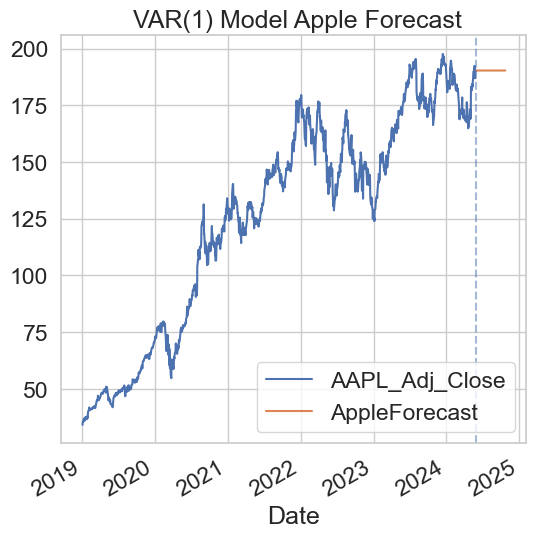

In [ ]:
# VAR Model Forecast

# get 100 step prediction values for differenced data
# drop NA values at start
diff_data_val = diff_data.values[diff_mod_var.k_ar :]  # noQA E203
pred = diff_mod_var.forecast(y=diff_data_val, steps=100)
pd.DataFrame(pred)

# extend index with 100 more business dates per USFederalHolidayCalendar
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
idx = pd.date_range("2024-05-30", periods=100, freq=us_bd)
df_forecast = pd.DataFrame(
    data=pred, index=idx, columns=["Apple1d", "Meta1d", "MSFT1d"]
)

# recover/re-align lagged predicted values to get forecasts at original dates
df_forecast["AppleForecast"] = df["AAPL_Adj_Close"].iloc[-1] + df_forecast["Apple1d"]
df_forecast["MetaForecast"] = df["META_Adj_Close"].iloc[-1] + df_forecast["Meta1d"]
df_forecast["MSFTForecast"] = df["MSFT_Adj_Close"].iloc[-1] + df_forecast["MSFT1d"]


# plot initial data with forecasted values for each of stock
df["AAPL_Adj_Close"].plot(figsize=(6, 6), legend=True)
df_forecast["AppleForecast"].plot(legend=True)
plt.axvline(x="2024-05-30", color="b", alpha=0.5, linestyle="--")
plt.title (" VAR(1) Model Apple Forecast")
plt.show()

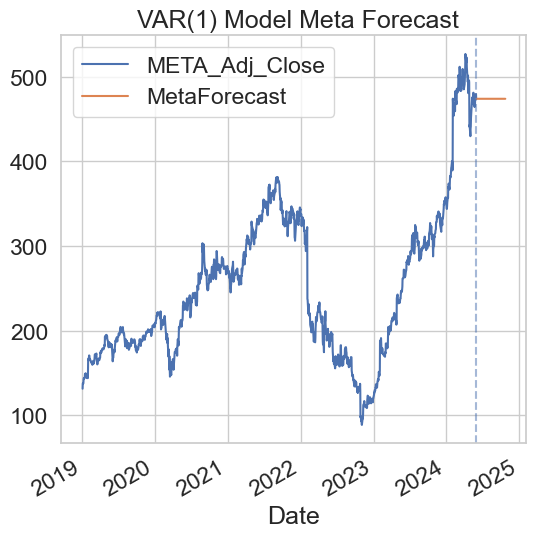

In [ ]:

# plot initial data with forecasted values for each of stock
df["META_Adj_Close"].plot(figsize=(6, 6), legend=True)
df_forecast["MetaForecast"].plot(legend=True)
plt.axvline(x="2024-05-30", color="b", alpha=0.5, linestyle="--")
plt.title (" VAR(1) Model Meta Forecast")
plt.show()

# 2.13 Johansen Test:
## We will find the number of co-integrating relationships among Google, Ford, Meta and Amazon from 2019 to 2024

## Google, Ford, Meta and Amazon Time Plots from 2019 to 2024

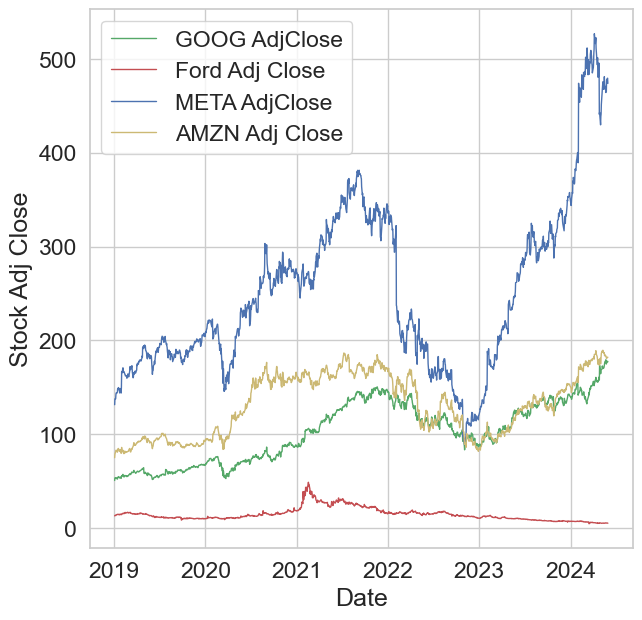

In [ ]:
Fig=plt.subplots(figsize=(7,7))
plt.plot(df.GOOG_Adj_Close, linewidth=1, c="g", label="GOOG AdjClose")
plt.plot(df.FORD_Adj_Close, linewidth=1, c="r", label="Ford Adj Close")

plt.plot(df.META_Adj_Close, linewidth=1, c="b", label="META AdjClose")
plt.plot(df.AMZN_Adj_Close, linewidth=1, c="y", label="AMZN Adj Close")
plt.xlabel("Date")
plt.ylabel("Stock Adj Close")
plt.legend()
plt.show()

## Augmented Dickey Fuller Test for META and First Difference of META

In [ ]:
# Augmented Dickey Fuller Test for META Adj Close
print("\n", "# " * 39, "\n")
meta_adf = ADF(df.META_Adj_Close, trend="n", method="bic")
print(
    "\nMeta Adj Close Augmented Dickey-Fuller Unit Root Test\n", meta_adf.regression.summary(),)

print("\nTest statistics and critical values: \n", meta_adf)




 # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #  


Meta Adj Close Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.197
Date:                Thu, 04 Jul 2024   Prob (F-statistic):                       0.274
Time:                        23:27:56   Log-Likelihood:                         -4520.6
No. Observations:                1359   AIC:                                      9043.
Df Residuals:                    1358   BIC:                                      9048.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                

In [ ]:
print("\n", "# " * 39, "\n")

# Augmented Dickey Fuller Test for difference of META Adj Close
meta_d_adf = ADF(df.META_Adj_Close.diff().dropna(), trend="n", method="bic")
print(
    "\nFirst Difference of META Adj Close Augmented Dickey-Fuller Unit Root Test\n",
    meta_d_adf.regression.summary(),
)
print("\nTest statistics and critical values: \n", meta_d_adf)
print("\n", "# " * 39, "\n")


 # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #  


First Difference of META Adj Close Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.524
Model:                            OLS   Adj. R-squared (uncentered):              0.524
Method:                 Least Squares   F-statistic:                              1495.
Date:                Thu, 04 Jul 2024   Prob (F-statistic):                   3.73e-221
Time:                        23:28:07   Log-Likelihood:                         -4516.3
No. Observations:                1358   AIC:                                      9035.
Df Residuals:                    1357   BIC:                                      9040.
Df Model:                           1                                                  
Covariance Type:            nonrobust            

## we can see that the META time series has a unit root whereas the META first difference is stationary. Hence, we can say META is  𝐼(1).
## We can proceed to conduct a Johansen test for cointegration. We will use a trace test...

## we need to decide the number of lags in the VEC model before we can use it to test cointegration

# 2.14 For Stock Price Adj Close

In [ ]:
# Selection of Number of Lags for VEC Model
vecm_data = pd.concat(
    [df.GOOG_Adj_Close, df.FORD_Adj_Close,df.META_Adj_Close, df.AMZN_Adj_Close], axis=1
)
print ("\n", "#" * 31)
# Fit VAR model and run lag selection tool
model = VAR(vecm_data)
x = model.select_order(maxlags=7, trend="c")
x.summary()


 ###############################


,AIC,BIC,FPE,HQIC
0,24.40,24.42,3.953e+10,24.41
1,5.988,6.065*,398.5,6.017
2,5.938,6.076,379.1,5.990*
3,5.924*,6.124,373.8*,5.999
4,5.928,6.190,375.4,6.026
5,5.935,6.259,378.1,6.056
6,5.951,6.336,384.0,6.095
7,5.951,6.398,384.2,6.118


In [ ]:
# Johansen Trace Test Result

jtest = coint_johansen(vecm_data, det_order=0, k_ar_diff=1)
print ("\n", "#" * 95)
# Print the results
print(f"Eigenvalues of VECM coefficient matrix : {jtest.eig}\n")

pd.DataFrame(
    {
        "Test statistic": jtest.trace_stat,
        "Critical values (90%)": jtest.trace_stat_crit_vals[:, 0],
        "Critical values (95%)": jtest.trace_stat_crit_vals[:, 1],
        "Critical values (99%)": jtest.trace_stat_crit_vals[:, 2],

    },
    index=["rank=0", "rank<=1", "rank<=2","rank<=3"],
)


 ###############################################################################################
Eigenvalues of VECM coefficient matrix : [1.14665918e-02 4.96762998e-03 4.52371423e-03 4.97082659e-06]



,Test statistic,Critical values (90%),Critical values (95%),Critical values (99%)
rank=0,28.588341,44.4929,47.8545,54.6815
rank<=1,12.926745,27.0669,29.7961,35.4628
rank<=2,6.163891,13.4294,15.4943,19.9349
rank<=3,0.006750,2.7055,3.8415,6.6349


# 2.15 VECM for Stocks Adj. Close Price

In [ ]:
# VECM model for diff=1
vecm_model = VECM(endog=vecm_data, k_ar_diff=1, deterministic="ci").fit()
print ("\n", "#" * 95)
print(vecm_model.summary())


 ###############################################################################################
Det. terms outside the coint. relation & lagged endog. parameters for equation GOOG_Adj_Close
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
L1.GOOG_Adj_Close    -0.0548      0.036     -1.522      0.128      -0.125       0.016
L1.FORD_Adj_Close    -0.1658      0.066     -2.506      0.012      -0.295      -0.036
L1.META_Adj_Close    -0.0276      0.011     -2.609      0.009      -0.048      -0.007
L1.AMZN_Adj_Close     0.0647      0.027      2.382      0.017       0.011       0.118
Det. terms outside the coint. relation & lagged endog. parameters for equation FORD_Adj_Close
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
L1.GOOG_Adj_Close     0.00

# S=302.32+1.0\*GOOG_Adj_Close+45.33\*FORD_Adj_Close+7.3310\*META_Adj_Close-21.3\*AMZN_Adj_Close

# 2.16 Time Plot for Deviation from Long-Term Equilibrium

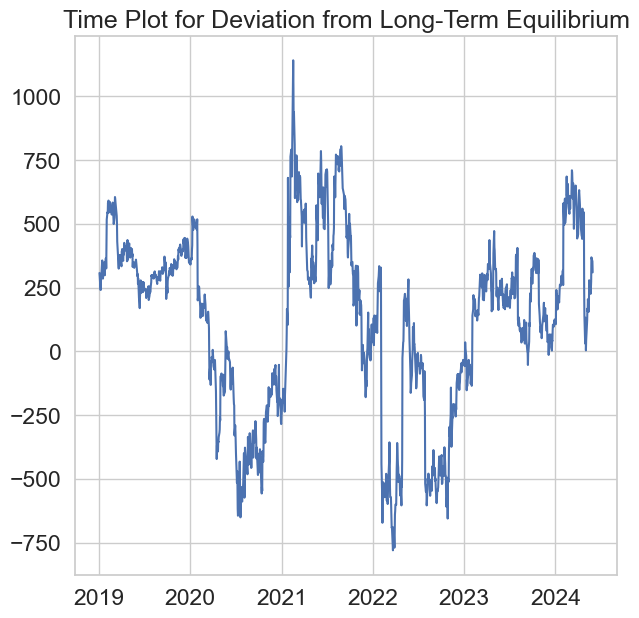

In [ ]:
# Time Plot for Deviation from Long-Term Equilibrium
"""
The precise coefficients of the linear combination are in:
vecm_model.const_coint and vecm_model.beta
# S=302.32+1.0\*GOOG_Adj_Close+45.33\*FORD_Adj_Close+7.3310\*META_Adj_Close-21.3\*AMZN_Adj_Close
"""
Fig, ax = plt.subplots(figsize=(7,7))
S = (
    vecm_model.const_coint[0][0]
    + vecm_model.beta[0][0] * vecm_data.GOOG_Adj_Close
    + vecm_model.beta[1][0] * vecm_data.FORD_Adj_Close
    + vecm_model.beta[2][0] * vecm_data.META_Adj_Close
    + vecm_model.beta[3][0] * vecm_data.AMZN_Adj_Close
)
plt.plot(S)
plt.title("Time Plot for Deviation from Long-Term Equilibrium")
plt.show()

## 2.17 ADF Test Result for Deviation from Long-Term Equilibrium

In [ ]:
# ADF Test Result for Deviation from Long-Term Equilibrium
print ("\n", "#" * 85)
S_adf = ADF(S, trend="n", method="bic")
print("Augmented Dickey-Fuller Unit Root Test\n", S_adf.regression.summary())
print("\nTest statistics and critical values: \n", S_adf)


 #####################################################################################
Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):              0.006
Method:                 Least Squares   F-statistic:                              8.798
Date:                Thu, 04 Jul 2024   Prob (F-statistic):                     0.00307
Time:                        23:31:18   Log-Likelihood:                         -7494.6
No. Observations:                1359   AIC:                                  1.499e+04
Df Residuals:                    1358   BIC:                                  1.500e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                           

## We can see that we easily reject that the deviation has a unit root because the test statistic (-2.966) is below 5% critical value (-1.94).

# 2.18 VECM For Stock CUM_Returns

In [ ]:
df2.iloc[0,7]=0
df2['GOOG_CUM_Return']=[(df_spy.iloc[i,7]+df_spy.iloc[i-1,7]) if i>0 else 0 for i in range(0,df2.shape[0]) ]
df2.iloc[0,3]=0
df2['FORD_CUM_Return']=[(df2.iloc[i,3]+df2.iloc[i-1,3]) if i>0 else 0 for i in range(0,df2.shape[0]) ]
df2.iloc[0,2]=0
df2['META_CUM_Return']=[(df2.iloc[i,2]+df2.iloc[i-1,2]) if i>0 else 0 for i in range(0,df2.shape[0]) ]
df2.iloc[0,6]=0
df2['AMZN_CUM_Return']=[(df2.iloc[i,6]+df2.iloc[i-1,6]) if i>0 else 0 for i in range(0,df2.shape[0]) ]


In [ ]:
df2.head()

,AAPL_Return,MSFT_Return,META_Return,FORD_Return,GM_Return,TSLA_Return,AMZN_Return,GOOG_Return,IBM_Return,GE_Return,GOOG_CUM_Return,FORD_CUM_Return,META_CUM_Return,AMZN_CUM_Return
Date,,,,,,,,,,,,,,
2019-01-03,-0.099608,-0.036788,0.000000,0.000000,-0.041320,-0.031472,0.000000,0.000000,-0.019964,0.001242,0.000000,0.000000,0.000000,0.000000
2019-01-04,0.042689,0.046509,0.047138,0.030769,0.033489,0.057697,0.050064,0.053786,0.039058,0.021092,-0.039106,0.030769,0.047138,0.050064
2019-01-07,-0.002226,0.001275,0.000725,0.007463,0.030903,0.054361,0.034353,-0.002167,0.007075,0.061968,-0.076423,0.038232,0.047863,0.084417
2019-01-08,0.019063,0.007251,0.032452,-0.007407,0.013097,0.001164,0.016612,0.007385,0.014219,-0.020595,-0.051600,0.000055,0.033177,0.050966
2019-01-09,0.016982,0.014300,0.011927,0.044776,0.010629,0.009483,0.001714,-0.001505,0.007177,-0.007009,0.027722,0.037369,0.044379,0.018327


## 2.19 ADF Test Results for Stock CUM_Returns - Stationary

In [ ]:
# ADF Test Results for CUM Returns - Stationary
goog_cumret_adf = ADF(df2.GOOG_CUM_Return, trend="n", method="bic")
print(
    "GOOG CUM Return Augmented Dickey-Fuller Unit Root Test\n", goog_cumret_adf.regression.summary()
)
print("\nTest statistics and critical values: \n", goog_cumret_adf)

# ADF Test Results for
print("\n", "# " * 39, "\n")
meta_cumret_adf = ADF(df2.META_CUM_Return, trend="n", method="bic")
print(
    "META CUM Return Augmented Dickey-Fuller Unit Root Test\n", meta_cumret_adf.regression.summary()
)
print("\nTest statistics and critical values: \n", meta_cumret_adf)

GOOG CUM Return Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.733
Model:                            OLS   Adj. R-squared (uncentered):              0.728
Method:                 Least Squares   F-statistic:                              143.6
Date:                Thu, 04 Jul 2024   Prob (F-statistic):                        0.00
Time:                        23:32:33   Log-Likelihood:                          3873.8
No. Observations:                1335   AIC:                                     -7698.
Df Residuals:                    1310   BIC:                                     -7568.
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.0

## ADF Test Results for Google and Meta CUM Returns is Stationary

## 2.20  Selection of Number of Lags for VEC Model

In [ ]:
# Selection of Number of Lags for VEC Model
vecm_data2 = pd.concat(
    [df2.GOOG_CUM_Return, df2.FORD_CUM_Return,df2.META_CUM_Return, df2.AMZN_CUM_Return], axis=1
)
print ("\n", "#" * 31)
# Fit VAR model and run lag selection tool
model2 = VAR(vecm_data2)
x2 = model2.select_order(maxlags=7, trend="c")
x2.summary()


 ###############################


,AIC,BIC,FPE,HQIC
0,-26.91,-26.89,2.057e-12,-26.90
1,-28.10,-28.03,6.233e-13,-28.07
2,-28.81,-28.67,3.084e-13,-28.76
3,-29.19,-28.99,2.112e-13,-29.11
4,-29.41,-29.15,1.690e-13,-29.31
5,-29.51,-29.18,1.534e-13,-29.38
6,-29.61,-29.23,1.382e-13,-29.47
7,-29.70*,-29.26*,1.259e-13*,-29.54*


## we can see the information criterion select lag 7 for the level of the VAR model.
# 2.21 Johansen Trace Test Result

In [ ]:
# Johansen Trace Test Result

jtest2 = coint_johansen(vecm_data2, det_order=0, k_ar_diff=7)

# Print the results
print(f"Eigenvalues of VECM coefficient matrix : {jtest2.eig}\n")
print ("\n", "#" * 95)
pd.DataFrame(
    {
        "Test statistic": jtest2.trace_stat,
        "Critical values (90%)": jtest2.trace_stat_crit_vals[:, 0],
        "Critical values (95%)": jtest2.trace_stat_crit_vals[:, 1],
        "Critical values (99%)": jtest2.trace_stat_crit_vals[:, 2],

    },
    index=["rank=0", "rank<=1", "rank<=2","rank<=3"],
)

Eigenvalues of VECM coefficient matrix : [0.14099517 0.13312516 0.11959538 0.0858133 ]


 ###############################################################################################


,Test statistic,Critical values (90%),Critical values (95%),Critical values (99%)
rank=0,692.136846,44.4929,47.8545,54.6815
rank<=1,486.658893,27.0669,29.7961,35.4628
rank<=2,293.511270,13.4294,15.4943,19.9349
rank<=3,121.302060,2.7055,3.8415,6.6349


In [ ]:
# VECM model for diff=1
print ("\n", "#" * 95)
vecm_model2 = VECM(endog=vecm_data2, k_ar_diff=7, deterministic="ci").fit()
print(vecm_model2.summary())


 ###############################################################################################
Det. terms outside the coint. relation & lagged endog. parameters for equation GOOG_CUM_Return
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
L1.GOOG_CUM_Return     0.7300      0.028     25.889      0.000       0.675       0.785
L1.FORD_CUM_Return    -0.0367      0.012     -3.104      0.002      -0.060      -0.014
L1.META_CUM_Return    -0.0418      0.026     -1.623      0.105      -0.092       0.009
L1.AMZN_CUM_Return     0.0656      0.030      2.168      0.030       0.006       0.125
L2.GOOG_CUM_Return    -1.1818      0.032    -37.008      0.000      -1.244      -1.119
L2.FORD_CUM_Return    -0.0299      0.012     -2.579      0.010      -0.053      -0.007
L2.META_CUM_Return    -0.0971      0.025     -3.893      0.000      -0.146      -0.048
L2.AMZN_CUM_Return     0

## S2=-0.0018+1.0\*GOOG_CUM_Return-0.62\*FORD_CUM_Retrun-2.09\*META_CUM_Return+2.157\*AMZN_CUM_Return

## 2.22 Time Plot for Deviation from Long-Term Equilibrium

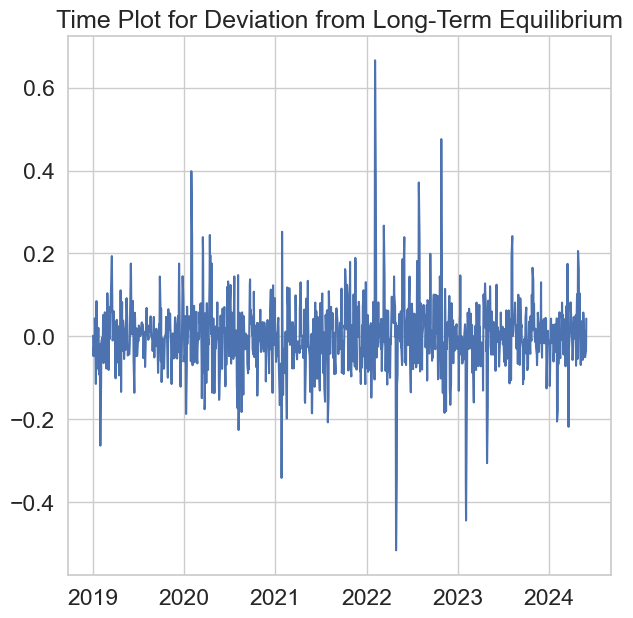

In [ ]:
# Time Plot for Deviation from Long-Term Equilibrium
"""
The precise coefficients of the linear combination are in:
vecm_model.const_coint and vecm_model.beta
# S=302.32+1.0\*GOOG_Adj_Close+45.33\*FORD_Adj_Close+7.3310\*META_Adj_Close-21.3\*AMZN_Adj_Close
"""
Fig, ax = plt.subplots(figsize=(7,7))
S2 = (
    vecm_model2.const_coint[0][0]
    + vecm_model2.beta[0][0] * vecm_data2.GOOG_CUM_Return
    + vecm_model2.beta[1][0] * vecm_data2.FORD_CUM_Return
    + vecm_model2.beta[2][0] * vecm_data2.META_CUM_Return
    + vecm_model2.beta[3][0] * vecm_data2.AMZN_CUM_Return
)
plt.plot(S2)
plt.title('Time Plot for Deviation from Long-Term Equilibrium')
plt.show()

# 2.23 ADF Test Result for Deviation from Long-Term Equilibrium

In [ ]:
# ADF Test Result for Deviation from Long-Term Equilibrium
S_adf2 = ADF(S2, trend="n", method="bic")
print("Augmented Dickey-Fuller Unit Root Test\n", S_adf2.regression.summary())
print("\nTest statistics and critical values: \n", S_adf2)

Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.475
Model:                            OLS   Adj. R-squared (uncentered):              0.471
Method:                 Least Squares   F-statistic:                              100.8
Date:                Thu, 04 Jul 2024   Prob (F-statistic):                   2.22e-177
Time:                        23:36:26   Log-Likelihood:                          1947.3
No. Observations:                1348   AIC:                                     -3871.
Df Residuals:                    1336   BIC:                                     -3808.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

## we can see that we easily reject that the deviation has a unit root because the test statistic (-11) is below 5% critical value (-1.94).

# Step 3 - Non-Stationarity, Cointegration, Engle-Granger Two-Step Procedure, Error Correction Model

## 3.1 Google Stock Price, ADF Test without Drift and Trend -Non Stationary

In [ ]:
# Google Stock Price, ADF Test without Drift and Trend
adf_none = ADF(goog, trend="n", method="bic")
print("Augmented Dickey-Fuller Unit Root Test\n", adf_none.regression.summary())
print("\nTest statistics and critical values: \n", adf_none)

Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.984
Date:                Thu, 04 Jul 2024   Prob (F-statistic):                       0.159
Time:                        23:37:33   Log-Likelihood:                         -2906.6
No. Observations:                1360   AIC:                                      5815.
Df Residuals:                    1359   BIC:                                      5820.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

## we know if we set the significance level at 5% and the DF t-statistic > 5% critical value,
## we fail to reject H0, This means there is a unit root for time series. Thus, we see that the
## ADF t-statistic (1.408) > 5% critical value (-1.94). Hence, we cannot reject 𝐻0 The conclusion is that there is a unit root in Google's stock price..i.e. ## series is non stationary..

## 3.2 META Stock Price, ADF Test without Drift and Trend -Non Stationary

In [ ]:
 # META Stock Price, ADF Test without Drift and Trend
adf_none = ADF(meta, trend="n", method="bic")
print("Augmented Dickey-Fuller Unit Root Test\n", adf_none.regression.summary())
print("\nTest statistics and critical values: \n", adf_none)

Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.180
Date:                Thu, 04 Jul 2024   Prob (F-statistic):                       0.278
Time:                        23:38:31   Log-Likelihood:                         -4523.6
No. Observations:                1360   AIC:                                      9049.
Df Residuals:                    1359   BIC:                                      9054.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

## we know if we set the significance level at 5% and the t-DF statistic > 5% critical value,
## we fail to reject H0, This means there is a unit root for time series.
## Thus, we see that the ADF t-statistic (1.086) > 5% critical value (-1.94). Hence, we cannot ## ## reject  𝐻0
##  The conclusion is that there is a unit root in META's stock price..i.e. series is non stationary..

# Google Stock Price, ADF Test with Drift but without Trend - Non Stationary

In [ ]:
# ADF test with drift but no trend
adf_drift = ADF(goog, trend="c", method="bic")
print("Augmented Dickey-Fuller Unit Root Test\n", adf_drift.regression.summary())
print("\nTest statistics and critical values: \n", adf_drift)

Augmented Dickey-Fuller Unit Root Test
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3055
Date:                Thu, 04 Jul 2024   Prob (F-statistic):              0.581
Time:                        23:39:15   Log-Likelihood:                -2906.1
No. Observations:                1360   AIC:                             5816.
Df Residuals:                    1358   BIC:                             5827.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1    

TThus, we see that the ADF test's statistic is -0.553.
 The 5% critical value is -2.86. Hence, we cannot reject  𝐻0
 The conclusion is that there is a unit root in Google's stock price with drift but without trend .i.e. series is non stationary..

## META Stock Price, KPSS Test Result - Not Trend Stationary

In [ ]:
# KPSS test
# (Set lags=-1 to use the old method that only depends on the sample size)
print(KPSS(meta, trend="ct", lags=-1))

    KPSS Stationarity Test Results   
Test Statistic                  0.476
P-value                         0.000
Lags                               24
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


## we can see the test results show that the 𝑝 value is smaller than 5%. It is a clear sign to ## reject 𝐻0 The conclusion is META's stock price is not trend stationary and has a unit root.

## 3.3 GOOG and META Plot from 2019 to 2024

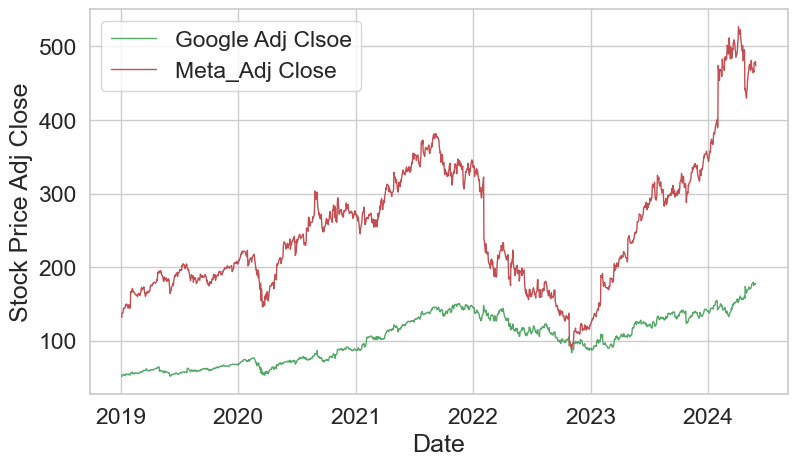

In [ ]:
Fig, ax= plt.subplots(figsize=(9,5))
plt.plot(df.GOOG_Adj_Close, linewidth=1, c="g", label="Google Adj Clsoe")
plt.plot(df.META_Adj_Close, linewidth=1, c="r", label="Meta_Adj Close")
plt.xlabel("Date")
plt.ylabel("Stock Price Adj Close")
plt.legend()
plt.show()

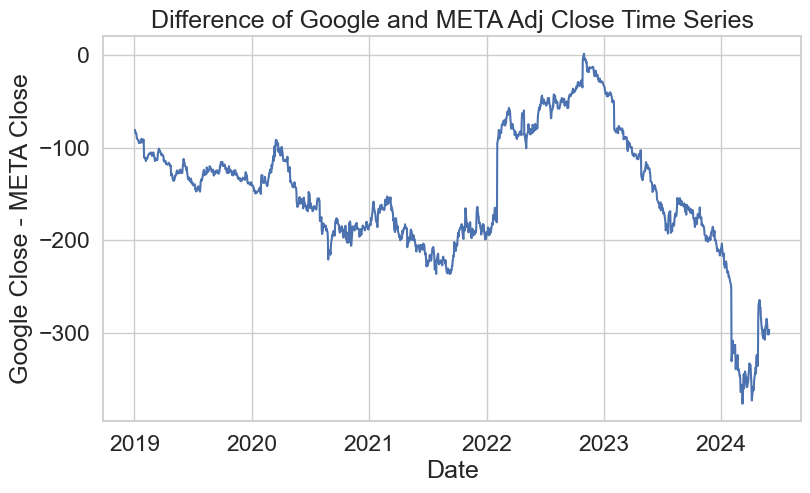

In [ ]:
# Difference of Google and Meta Time Series
Fig, ax= plt.subplots(figsize=(9,5))
plt.plot(df.GOOG_Adj_Close - df.META_Adj_Close)
plt.xlabel("Date")
plt.ylabel("Google Close - META Close")
plt.title('Difference of Google and META Adj Close Time Series')
#plt.legend()
plt.show();

## 3.4 ADF test for differenced Google and Meta Time Series i.e. I(1)- Stationary

In [ ]:
# ADF Test Results for
print("\n", "# " * 39, "\n")
goog_3_adf = ADF(df.GOOG_Adj_Close.diff().dropna(), trend="n", method="bic")
print(
    "First Difference of GOOG Adj Close Augmented Dickey-Fuller Unit Root Test\n", goog_3_adf.regression.summary()
)
print("\nTest statistics and critical values: \n", goog_3_adf)

# ADF Test Results for
print("\n", "# " * 39, "\n")
meta_3_adf = ADF(df.META_Adj_Close.diff().dropna(), trend="n", method="bic")
print(
    "First Difference of META Adj Close Augmented Dickey-Fuller Unit Root Test\n", meta_3_adf.regression.summary()
)
print("\nTest statistics and critical values: \n", meta_3_adf)
print("\n", "# " * 39, "\n")


 # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #  

First Difference of GOOG Adj Close Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.528
Model:                            OLS   Adj. R-squared (uncentered):              0.528
Method:                 Least Squares   F-statistic:                              1520.
Date:                Thu, 04 Jul 2024   Prob (F-statistic):                   1.10e-223
Time:                        23:42:22   Log-Likelihood:                         -2901.0
No. Observations:                1358   AIC:                                      5804.
Df Residuals:                    1357   BIC:                                      5809.
Df Model:                           1                                                  
Covariance Type:            nonrobust             

## The differenced Time Series of Google and Meta Adj Close is stationary..i.e. I(1)

In [ ]:
# ADF Test Results for Returns
goog_4_adf = ADF(df2.GOOG_Return, trend="n", method="bic")
print(
    "GOOG Return Augmented Dickey-Fuller Unit Root Test\n", goog_4_adf.regression.summary()
)
print("\nTest statistics and critical values: \n", goog_4_adf)

# ADF Test Results for
print("\n", "# " * 39, "\n")
meta_4_adf = ADF(df2.META_Return, trend="n", method="bic")
print(
    "META Return Augmented Dickey-Fuller Unit Root Test\n", meta_4_adf.regression.summary()
)
print("\nTest statistics and critical values: \n", meta_4_adf)

GOOG Return Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.546
Model:                            OLS   Adj. R-squared (uncentered):              0.546
Method:                 Least Squares   F-statistic:                              1634.
Date:                Thu, 04 Jul 2024   Prob (F-statistic):                   3.26e-235
Time:                        23:42:45   Log-Likelihood:                          3397.6
No. Observations:                1359   AIC:                                     -6793.
Df Residuals:                    1358   BIC:                                     -6788.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025  

## 3.5 Two-Step Residual Based Test for Cointegration
## (aka Phillips and Ouliaris cointegration test)

## for Goog_Adj_Close and META_Adj_Close

In [ ]:
# Two-Step Residual Based Test for Cointegration for Adj Close
# (aka Phillips and Ouliaris cointegration test)
print(
    phillips_ouliaris(
        df.GOOG_Adj_Close, df.META_Adj_Close, trend="c", test_type="Za", kernel="bartlett"
    )
)

Phillips-Ouliaris Za Cointegration Test
Statistic: -4.562554323687663
P-value: 0.6137783319670131
Null: No Cointegration, Alternative: Cointegration
Kernel: Bartlett
Bandwidth: 10.769
Trend: c
Distribution Order: 3


## For Returns

In [ ]:
# Two-Step Residual Based Test for Cointegration for Returns
# (aka Phillips and Ouliaris cointegration test)
print(
    phillips_ouliaris(
        df2.GOOG_Return, df2.META_Return, trend="c", test_type="Za", kernel="bartlett"
    )
)

Phillips-Ouliaris Za Cointegration Test
Statistic: -1340.8781076114894
P-value: 0.0
Null: No Cointegration, Alternative: Cointegration
Kernel: Bartlett
Bandwidth: 10.551
Trend: c
Distribution Order: 3


In [ ]:
# Two-Step Residual Based Test for Cointegration for CUM Returns
# (aka Phillips and Ouliaris cointegration test)
print(
    phillips_ouliaris(
        df2.GOOG_CUM_Return, df2.META_CUM_Return, trend="c", test_type="Za", kernel="bartlett"
    )
)

Phillips-Ouliaris Za Cointegration Test
Statistic: -285.9020823559865
P-value: 0.0
Null: No Cointegration, Alternative: Cointegration
Kernel: Bartlett
Bandwidth: 38.377
Trend: c
Distribution Order: 3


## p-value is below 0.05, ence, we can reject  𝐻0
  and claim that Google and Meta are cointegrated.

# 3.6 Error Correction Model Result for Google on META Return

In [ ]:
# Error Correction Model Result for Google on Meta Return
ecm_model = UECM(
    endog=pd.DataFrame(df2.GOOG_Return),
    lags=1,
    exog=pd.DataFrame(df2.META_Return),
    order=1,
    trend="c",
).fit()
print(ecm_model.summary())

                              UECM Model Results                              
Dep. Variable:          D.GOOG_Return   No. Observations:                 1360
Model:                     UECM(1, 1)   Log Likelihood                3755.542
Method:               Conditional MLE   S.D. of innovations              0.025
Date:                Thu, 04 Jul 2024   AIC                          -7501.084
Time:                        23:44:57   BIC                          -7475.011
Sample:                             1   HQIC                         -7491.323
                                 1360                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0006      0.000      1.385      0.166      -0.000       0.001
GOOG_Return.L1      -1.0226      0.027    -37.702      0.000      -1.076      -0.969
META_Return.L1       0.4283 

## The output shows the ECM results for Google and Meta Returns. From the results, we can ## see all coefficient are significant.  𝜆 is Goog_Return.L1 = -1.0240.
## It means if the  Google Return deviates 1 point from the long-term equilibrium with Meta ## ## Return at time  𝑡−1, Google Return will drop 1.0240 point at time t to bring it back to long-## term equilibrium.

## 3.7 Durbin-Watson Test Result for ECM of Google and Meta Returns

In [ ]:
# Durbin-Watson Test Result for ECM of Google and Meta Returns
print(durbin_watson(ecm_model.fittedvalues))

2.695333803702566


## 3.8 Error Correction Model Result for Google on Meta Adj Close

In [ ]:
# Error Correction Model Result for Google on Meta Adj Close
ecm_model2 = UECM(
    endog=pd.DataFrame(df.GOOG_Adj_Close),
    lags=1,
    exog=pd.DataFrame(df.META_Adj_Close),
    order=1,
    trend="c",
).fit()
print(ecm_model2.summary())

                              UECM Model Results                              
Dep. Variable:       D.GOOG_Adj_Close   No. Observations:                 1360
Model:                     UECM(1, 1)   Log Likelihood               -2656.995
Method:               Conditional MLE   S.D. of innovations            107.687
Date:                Thu, 04 Jul 2024   AIC                           5323.990
Time:                        23:46:21   BIC                           5350.062
Sample:                             1   HQIC                          5333.751
                                 1360                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0342      0.158     -0.216      0.829      -0.345       0.277
GOOG_Adj_Close.L1      -0.0039      0.002     -1.902      0.057      -0.008       0.000
META_Adj_Close.L

## 3.9 Durbin-Watson Test Result for ECM of Google and Meta Adj Close

In [ ]:
# Durbin-Watson Test Result for ECM of Google and Meta Returns
print(durbin_watson(ecm_model2.fittedvalues))

2.0438735315482233


## The result is 2.04 which is close to 2, we can see the residuals are serially uncorrelated,
## which is the ECM model required for the residuals.

# THanks.